# A physiologically based model for ethanol and acetaldehyde metabolism in human beings
Alcohol. 2005 Jan; 35(1):3-12. https://doi.org/10.1016/j.alcohol.2004.11.004 \
Authors: David M. Umulis, Nihat M. Gürmen, Prashant Singh, H. Scott Fogler \
Modified by: Anna Alford, Nissa Larson 


##Abstract
 
Existing models for ethanol metabolism succeeded in advancing our understanding of ethanol clearance in humans, but they all failed to account for ethanol’s major metabolite, acetaldehyde. Though acetaldehyde is highly toxic and contributes to a number of physiological symptoms, it is highly difficult to discern its levels in the body due to artifactual formation and other technical problems. For this reason, this paper proposes a physiologically based pharmacokinetic (PBPK) model that accurately reflects existing ethanol and acetaldehyde concentration-time data. The metabolic pathway is divided into five compartments: the stomach, gastrointestinal tract, liver, central fluid, and muscle. Enzymatic rate laws are derived for both alcohol dehydrogenase (ADH) and acetaldehyde dehydrogenase (ALDH), two endogenous enzymes responsible for the oxidation of ethanol and acetaldehyde, respectively. Kinetic parameters taken from literature and best-fit parameters were established by minimizing the squared error between the model predictions and experimental data. 

To expand on this work, our models establish a more comprehensive analysis of the effects of various medications on the ethanol and acetaldehyde concentration-time profile. Medications such as acetaminophen are implicated in the inhibition of acetaldehyde dehydrogenase, thereby limiting acetaldehyde oxidation. We examine how the introduction of various medications interferes with ethanol metabolism as modeled by this paper in people with various ALDH genotypes, with and without accounting for the reverse reaction of acetaldehyde back into ethanol, and in a fasting versus fed states. 

> Here's a link to a short video presentation we made summarizing the Introduction & Background information for this paper: https://www.youtube.com/watch?v=zON8yAHwfgo


## Introduction

From the initial in vivo ethanol elimination model featuring a pseudo zero-order elimination process (Widmark, 1932) to more recent developments with improved considerations for modeling the metabolic pathway (Derr, 1993; Levitt, 2002; Norberg, 2001), all models prior to this paper’s publication failed to include the production and interaction of acetaldehyde, ethanol’s major metabolite. This was primarily owing to the fact that acetaldehyde levels were difficult to discern due to artifactual formation from the nonenzymatic oxidation of ethanol during protein precipitation (Hernandez-Munoz, 1992). However, the lack of inclusion of acetaldehyde in the metabolic pathway renders models of ethanol metabolism highly inaccurate. 
Acetaldehyde is highly toxic in comparison to ethanol (Brien, 1983), contributing to symptoms such as cardiac arrhythmias, nausea, anxiety, and facial flushing (Condouris, 1987; Peng, 1999; Yamamoto, 2000). It is metabolized from ethanol through the enzyme alcohol dehydrogenase (ADH), as shown in Figure 1 below. This reaction is also reversible, indicating that higher levels of acetaldehyde in the system will be converted back into ethanol in the absence of scavenging by aldehyde dehydrogenase (ALDH). For this reason, genetic deficiencies of ALDH in addition to the introduction of ALDH-inhibiting medications such as acetaminophen, cimetidine, and salicylates can have an indirect influence on ethanol levels in the body (Balesano, 2021; Lai, 2013; Lee, 2013; Lee, 2015; Sato,1991). Thus, the ability to predict levels of acetaldehyde in the body is crucial for the accurate modeling of ethanol’s metabolism and its effects on the body.  

<img src="https://drive.google.com/uc?export=view&id=1KbaFnmZQWPWmkMTYWA0BTVcPrhd1ed6E"/> \

> #### Figure 1: The Metabolic Pathway of Ethanol 
Ethanol is primarily metabolized into acetaldehyde by alcohol dehydrogenase (ADH) in the liver. Acetaldehyde is eventually scavenged by aldehyde dehydrogenase (ALDH), typically found in the mitochondria, which converts it into acetyl CoA to be utilized as energy in the Citric Acid Cycle (Edenberg 2007) \

This paper is therefore the first to establish a more accurate model of ethanol metabolism by taking into account its interaction with acetaldehyde through reversible enzyme kinetics. It does this by constructing mass balance equations for the physiological compartments of ethanol metabolism and a derivation of rate laws coupled with parameters from literature to enable simultaneous predictions of both ethanol and acetaldehyde concentrations in the blood over time. Furthermore, its ability to predict variations of ethanol metabolism in individuals with various ALDH-deficiencies broadens the applicability of this model and demonstrates the relevance of ALDH in ethanol metabolism. 
Since this paper’s introduction of an improved model of ethanol metabolism, numerous papers have emerged that have applied and expanded the model even further. One such improvement that was not explored by this paper is the consideration of NADH in influencing ethanol metabolism, as well as ethanol’s interaction with various dehydrogenases (Chalhoub, 2022). Newer models of ethanol metabolism have also emphasized the importance of considering food intake and weight to enable more accurate predictions of blood ethanol levels during a variety of eating and drinking scenarios (Moore, 2022). Another recent study aimed at developing a more personalizable model has combined a physiologically-based pharmacokinetic model, as introduced by this paper, with a whole-body genome-scale model to gain additional insights into the role of less explored processes and genetic variations on ethanol metabolism (Zhu, 2021). From these articles, it is evident that this paper opened the gateway for improving the accuracy of and enabling broader predictions for models of ethanol metabolism. 

### Expected Learning Outcomes: 

The goals of this project are as follows: 
* To aid in developing an understanding of rate law derivation for enzymatic reactions. 
* To encourage a deeper level of understanding the metabolic pathway of ethanol and factors to consider in its modeling, such as the effects of external variables like medications.  
* To practice adjusting a model to make it applicable to people of various situations (i.e. genotypes, fasted v. fed states, or on medications). 

##Methods

*Equations, reactions, boundary conditions,
geometry, assumptions, computational method, and parameter values*
> Here's a link to a ~10 minute video presentation where we walk-through the Tasks of this project: https://www.youtube.com/watch?v=vzGIHtpGvJI


Before can begin developing our model, we first start by importing the necessary libraries for our code:

In [ ]:
import matplotlib.pyplot as plt         # import plotting libraries
import numpy as np                      # import data structuring
from scipy.integrate import odeint      # import ODE integrating function
import math as m                        # import math operations
import pandas as pd                     # import pandas module to handle data
from scipy.integrate import simpson     #two integration methods to find area under a curve
from numpy import trapz

import string                           #used for figure labeling

### Rate Law Derivation 
We begin with deriving the rate law for ethanol metabolism, which is dependent on the alcohol dehydrogenase ($ADH$) reaction pathway. \

This model has the following important assumptions: 
1. The concentration of oxygenated nicotinamide adenine dinucleotide ($NAD^+$) reaches a rate-limiting state shortly after consumption, wherafter it remains constant.  
2.  The net formation of the substrate-enzyme complex is zero.  Thus, the pseudo steady state hypothesis (PSSH) can be applied to the enzyme-ethanol and enzyme-acetaldehdye complexes (Fogler, 1999). 

From these assumptions, the rate of the enzymatic reaction can be written as: \
$ r_{A1} = \dfrac{V_m*(S_1)(S_2)}{K_{12} + K_1(S_1)+K_2(S_2)+(S_1)(S_2)} $ \

where $S_1 \equiv C_{Alcohol}$, and $S_2 \equiv C_{NAD+}$. 

This equation can be further simplified to:

$ r_{A1} = \dfrac{ \dfrac{V_m(S_2)}{K_1+S_2}*S_1}{ \dfrac{K_{12}+K_2(S_2)}{K_1+S_2}+S_1}$ \
where $ K_M ≡ \dfrac{K_{12}+K_2(S_2)}{K_1+S_2} $, and $V_{max*} \equiv \dfrac{V_{max}(S_2)}{K_1+S_2} $.

Thus, the rate of metabolism increases toward a maximum value, $V_m$, where $K_1$ is the concentration at which the rate is one-half the maximum. 

The concentration of NAD${^+}$ is likely to be limiting, but this study does not examine its exact levels, and our project will retain these assumptions. 


While the rate law derivations for ethanol and acetaldehyde metabolism are similar, one major difference is that acetaldehyde oxidation to acetate is not reversible. The mitochondrial class acetaldehyde dehydrogenase ($ALDH2$) accounts for more than 99% of acetaldehdye oxidation in human beings, and thus is the basis for the rate law (Riveros-Rosas et al., 1997). 

<img src="https://drive.google.com/uc?export=view&id=15Mv7mVzrkvRgld5xcdj3lbZYnTHWBTCF"/>

> #### Figure 2
Chemical equations governing ethanol and acetaldehyde oxidation (taken from the original paper).  



#### TASK 1: 

Given the kinetic and chemical equations for ethanol and acetaldehyde metabolism in Figure 2, attempt to derive equations for the rates of ethanol and acetaldehyde formation. A list of additional variables have been provided in Table 1 below. To comprehend the enzymatic reactions occuring, try to rationalize solving the rate laws on your own first, and the answers will be provided in Figure 3A in the next section.  


> #### Table 1 

| Variable | Description |
|-----------| ----------|
| $r_{Al}$ | Rate of ethanol formation | 
| $r_{Ac}$ | Rate of acetaldehyde formation | 
| $V_{maxADH}$ | maximum enzymatic oxidation rate of ethanol |  
| $K_{mADH}$ | reaction constant for above rate law |  
| $V_{revADH}$ | maximum rate of the reverse reaction of acetaldehyde to ethanol | 
| $K_{revADH}$ | reaction constant for above rate law | 
| $V_{maxALDH}$ | maximum enzymatic oxidation rate of acetaldehyde |  
| $K_{mALDH}$ | reaction constant for above rate law |  

 

In [ ]:
# Rate Law for Ethanol Formation: 
# def rAl(CAl,CAc,VmAl,KmAl,VrevAl,KrevAl): #variables in these positions when the function is called will be renamed within the function, independent of what they have been named outside of the function


# Rate Law for Acetaldehyde Formation: 
# def rAc(CAc,VmAc,KmAc):


#### TASK 2: 

In addition to defining these rates for ethanol and acetaldehyde metabolism, we are interested in looking at the significance of eliminating the effects of the Reverse Reaction. Referring to the function $rAl$, devise a function $rAlRev$ that demonstrates the rate of ethanol formation if we neglect to consider the ability of acetaldehdye to convert back into ethanol. 

Hint: The variables in $rAl$ that include the effects of the reverse reaction are $K_{revADH}$ and $V_{revADH}$. 

In [ ]:
# Rate for eliminating the effects of the Reverse Reaction: 
#def rAlRev(y1, y2, VmAl, KmA1, Vrev, Krev):


SOLUTION: 

In [ ]:
# Rate Law for Ethanol Formation: 
def rAl(CAl,CAc,VmAl,KmAl,VrevAl,KrevAl):
  rAl = (-VmAl*CAl+VrevAl*CAc)/(KmAl+CAl+KrevAl*CAc)
  return rAl

# Rate Law for Acetaldehyde Formation: 
def rAc(CAc,VmAc,KmAc):
  rAc = -CAc*VmAc/(KmAc+CAc)
  return rAc

# Rate for eliminating the effects of the Reverse Reaction: 
def rAlRev(CAl, CAc, VmAl, KmA1, Vrev, Krev): 
  rAlRev = (-VmAl*CAl)/(KmAl + CAl)
  return rAlRev


Finally, we define a rate law for the stomach's absorption of ethanol, which was given by Wilkinson et al. (1975) and is defined below: 

In [ ]:
##Defining Rate Functions: 
# Stomach absorption rate function from Wilkinson et al. (1975):
def ke(Al, Ds): #dependent on initial Dose of ethanol (Ds)
  a = Al[2] 
  kemax = Al[3]
  ke = kemax/(1+a*(Ds/1000)**2)
  return ke



### Physiologically Based Model 

Next, the model was lumped into five organ compartments: the stomach, gastrointestinal tract, liver, central fluid, and muscle. The stomach compartment consists only of the volume of alcoholic beverage consumed and no tissue water volume. The alcohol is then processed into the gastrointestinal tract, where ethanol absorption is initiated. A perfusion-limited model was chosen due to the rapid diffusion of ethanol and acetaldehyde that is limited by the rate they are transported to the tissues, not the rate of absorption. The parameters used for each compartment are outlined in Table 2 below.  

> #### Table 2
Tissue water volumes, blood flow rates, and perfusion rates for the "standard" 69.4-kg man (Rowland et al., 1995). (Table taken from the original paper). 

| Compartment | Tissue | $H_2O$ volume (L) | Blood flow (ml/min) | Perfusion rate (ml/min/ml $H_2O)$ | Residence time (min) | Source | 
|-----------| ----------|-------|-------|-------|-------|-------|
| Central $V_C = 11.56$ l | Lungs | 0.37 | 5,000 | 13.33 | 0.07 | a | 
| | Kidneys | 0.21 | 1,100 | 5.14 | 0.19 | a |
| | Blood | 2.84 | 5,000 | 1.76 | 0.57 | a |
| | Brain | 1.03 | 700 | 0.68 | 1.47 | a | 
| | Heart, spleen | 1.18 | 350 | 0.29 | 3.37 | a | 
| | Bone | 2.44 | 250 | 0.10 | 10.00 | a | 
| | Skin | 3.49 | 300 | 0.085 | 11.63 | a | 
| Muscle $V_M = 25.76$ l | Fat | 3.76 | 200 | 0.053 | 18.80 | a |
| | Muscle | 22.0 | 750 | 0.034 | 29.33 | a| 
| Gastrointestinal tract $V_G = 2.4 l$ | Stomach/intestine | 2.40 | 900 | 0.375 | 2.67 | a, b | 
 | Liver $V_L = 1.08$ l| Liver | 1.08 | 1,350 | 1.25 | 0.80 | a,c |


The organ volumes were lumped into three compartments determined by the following criteria: 
1. The rate of perfusion of fluid through each organ 
2. The physical connectivity between organs
3. The metabolic activity of ethanol and acetaldehyde

The perfusion rate is defined as the rate of flow into and out of an organ per unit volume of tissue. The liver was modeled as a tubular flow reactor based on the results of Keiding and Priisholm (1984), and is where the bulk of ethanol and acetaldehyde metabolism occurs. The gastrointestinal tract was chosen to encompass both stomach and intestine water volumes due to the fact that they are directly connected to the liver and are the initial sites of ethanol absorption. Finally, organs in the central compartment were separated from those in the muscle compartment on the basis of having a perfusion rate greater than  $0.08$ ml/min/ml $H_{2}O$. \

The flow of blood between compartments determined the reaction rate laws for this model's mass balance equations illustrated in Fig. 3B below.



<img src="https://drive.google.com/uc?export=view&id=1WmfLJ9AlBem4MKbA76PCSVaVXdxhJj0t"/>


> #### Figure 3 
 A. The derivation of rate laws that govern ethanol and acetaldehyde metabolism. 
B. Mass balance equations for each of the model compartments are included. 
ADH = Alcohol dehydrogenase; ALDH = acetaldehyde dehydrogenase; NAD$^+$ = oxidized form of nicotinamide adenine dinucleotide; NADH = reduced form of nicotinamide adenine dinucleotide. 
The left side of A is adapted from F. Lundquist and H. Wolthers, *The kinetics of alcohol elimination in man, Acta Pharmacologica Et Toxicologica 14*(3), pp. 265-289, copyright 1958, with permission of Blackwell Publishing. The right side of A is adapted from *Archives of Medical Research 28*(4), H. Riveros-Rosas, A. Julian-Sanchez, and E. Pina, Enzymology of ethanol and acetaldehyde metabolism in mammals, pp. 453-471, copyright 1997, with permission form *IMSS*. (Figure taken from the original paper). 

Utilizing the data from Table 2, we can begin defining initial parameters for our various compartments. We supplement these with parameters for ethanol and acetaldehyde absorption taken from literature (Rowland et al., 1995). 

In [ ]:
#Ethanol Parameters: 
VmaxAl = 2.2047 # Max. enzymatic oxidation rate of ethanol
KmAl = 0.3898 # reaction constant for ethanol metabolism
a = 1.5  # (1/hr) 
kemax = 0.06 # (1/g^2)  
Al = [VmaxAl, KmAl, a, kemax] # Vector containing all parameters pertaining to ethanol metabolism 

#Acetaldehyde Absorption Parameters: 
VmaxAc = 2.7274 #Stomach absorption rate of acetaldehyde
KmAc = 0.0011
Ac = [VmaxAc, KmAc] 

#Reverse Reaction Parameters:
Vrev = 30.26 
Krev = 1                                                      
Rev = [Vrev, Krev]

#Tissue Volumes: 
Vc = 11.56 # Central Compartment (L) 
Vm = 25.76 # Muscle Compartment (L) 
Vg = 2.4 # Gastrointestinal Tract (L)
Vl = 1.1 # Liver Compartment (L)
dVl = Vl/10 #Discretized dVl (explained in note below )

#Tissue Flow Rates:
vm = 0.95        #Muscle (l/min)
vl = 1.35        #Liver (l/min)
vb = 12.7        #Central (l/min)


Note: Since we are modeling the liver compartment as a plug flow reactor, we must create the variable $dVl$ that depends on how many compartments we divide the liver into. We choose to divide it into 10 compartments to best match the original model, and thus $dVl = Vl/10$. 

#### TASK 3:
Given the equations in Figure 3, we can construct a function $dAldt1$ that models the metabolism of ethanol and acetaldehyde through each of these physiological compartments. Utilizing the parameters defined above for tissue volumes and flow rates, finish constructing the function $dAldt1$ below by replacing the "???" with the correct variables: 

In [ ]:
'''
def dAldt(y, t, S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlr):
  Cs = S1[0]     # Concentration of ethanol in the stomach at t=0
  ks = S1[1]     # Rate constant for metabolizing ethanol in the stomach 
  Vs = S1[2]     # Maximum rate of metabolism in the stomach 

  Vrev = Rev[0];
  Krev = Rev[1];

  Mass balance equations: 
   Equations 1 & 2 are for the Central Compartment 
   Equations 3 & 4 are for the Muscle Compartment 
   Equations 5-24 are for the Liver Compartment (modeled as a flow reactor)
   Equations 25 and 26 are for the GI compartment 
   Equation 27 is the absorption from the stomach (where ethanol is first introduced)
  

  dAldt = [(-???*(y[0]-y[22])-vm*(y[0]-y[2]))/Vc,  #1
           
          (-vl*(y[1]-y[23])-???*(y[1]-y[3]))/Vc,   #2

          (vm*(y[0]-y[2]))/Vm,        #3
         
          (vm*(y[1]-y[3]))/Vm,        #4
    
          (vl*((1/3)*y[0]+(2/3)*y[24]-y[4])+???(y[4],y[5],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                               #5
         
          (vl*((1/3)*y[1]+(2/3)*y[25]-y[5])-rAlr(y[4],y[5],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[5],VmaxAc,KmAc)*dVl)/dVl,     #6
         
          (vl*(y[4]-y[6])+rAlr(y[6],y[7],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                                 #7
         
          (vl*(y[5]-y[7])-rAlr(y[6],y[7],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[7],VmaxAc,KmAc)*dVl)/dVl,                       #8
         
          (vl*(y[6]-y[8])+rAlr(y[8],y[9],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                                 #9
         
          (vl*(y[7]-y[9])-rAlr(y[8],y[9],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[9],VmaxAc,KmAc)*dVl)/dVl,                       #10
         
          (vl*(y[8]-y[10])+rAlr(y[10],y[11],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                              #11
         
          (vl*(y[9]-y[11])-rAlr(y[10],y[11],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[11],VmaxAc,KmAc)*dVl)/dVl,                   #12
         
          (vl*(y[10]-y[12])+rAlr(y[12],y[13],VmaxAl,KmAl,Vrev,Krev)*dVl)/???,                                             #13
         
          (vl*(y[11]-y[13])-rAlr(y[12],y[13],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[13],VmaxAc,KmAc)*dVl)/dVl,                  #14
         
          (vl*(y[12]-y[14])+rAlr(y[14],y[15],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                             #15
         
          (vl*(y[13]-y[15])-rAlr(y[14],y[15],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[15],VmaxAc,KmAc)*dVl)/dVl,                  #16
         
          (vl*(y[14]-y[16])+rAlr(y[16],y[17],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                             #17
         
          (vl*(y[15]-y[17])-rAlr(y[16],y[17],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[17],VmaxAc,KmAc)*dVl)/dVl,                  #18
         
          (vl*(y[16]-y[18])+rAlr(y[18],y[19],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                             #19
         
          (vl*(y[17]-y[19])-rAlr(y[18],y[19],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[19],VmaxAc,KmAc)*dVl)/dVl,                  #20
         
          (vl*(y[18]-y[20])+rAlr(y[20],y[21],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                             #21
         
          (vl*(y[19]-y[21])-rAlr(y[20],y[21],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[21],VmaxAc,KmAc)*dVl)/dVl,                  #22
         
          (vl*(y[20]-y[22])+rAlr(y[22],y[23],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                             #23
         
          (vl*(y[21]-y[23])-rAlr(y[22],y[23],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[23],VmaxAc,KmAc)*dVl)/dVl,                  #24  
         
          ((2/3)*vl*(y[0]-y[24])+ks*Cs*y[26])/???,      #25
         
          ((2/3)*vl*(y[1]-y[25]))/Vg,                  #26
        
          -ks*y[26],     #27
           
           ]      

  return np.array(dAldt)
'''

'\ndef dAldt(y, t, S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlr):\n  Cs = S1[0]     # Concentration of ethanol in the stomach at t=0\n  ks = S1[1]     # Rate constant for metabolizing ethanol in the stomach \n  Vs = S1[2]     # Maximum rate of metabolism in the stomach \n\n  Vrev = Rev[0];\n  Krev = Rev[1];\n\n  Mass balance equations: \n   Equations 1 & 2 are for the Central Compartment \n   Equations 3 & 4 are for the Muscle Compartment \n   Equations 5-24 are for the Liver Compartment (modeled as a flow reactor)\n   Equations 25 and 26 are for the GI compartment \n   Equation 27 is the absorption from the stomach (where ethanol is first introduced)\n  \n\n  dAldt = [(-???*(y[0]-y[22])-vm*(y[0]-y[2]))/Vc,  #1\n           \n          (-vl*(y[1]-y[23])-???*(y[1]-y[3]))/Vc,   #2\n\n          (vm*(y[0]-y[2]))/Vm,        #3\n         \n          (vm*(y[1]-y[3]))/Vm,        #4\n    \n          (vl*((1/3)*y[0]+(2/3)*y[24]-y[4])+???(y[4],y[5],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                    

SOLUTION:

In [ ]:
def dAldt(y, t, S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlr):
  Cs = S1[0]     # Concentration of ethanol in the stomach at t=0
  ks = S1[1]     # Rate constant for metabolizing ethanol in the stomach 
  Vs = S1[2]     # Maximum rate of metabolism in the stomach 

  Vrev = Rev[0];
  Krev = Rev[1];

  ''' 
  Mass balance equations: 
   Equations 1 & 2 are for the Central Compartment 
   Equations 3 & 4 are for the Muscle Compartment 
   Equations 5-24 are for the Liver Compartment (modeled as a flow reactor)
   Equations 25 and 26 are for the GI compartment 
   Equation 27 is the absorption from the stomach (where ethanol is first introduced)
  '''


  dAldt = [(-vl*(y[0]-y[22])-vm*(y[0]-y[2]))/Vc,  #1
           
          (-vl*(y[1]-y[23])-vm*(y[1]-y[3]))/Vc,   #2

          (vm*(y[0]-y[2]))/Vm,        #3
         
          (vm*(y[1]-y[3]))/Vm,        #4
    
          (vl*((1/3)*y[0]+(2/3)*y[24]-y[4])+rAlr(y[4],y[5],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                               #5
         
          (vl*((1/3)*y[1]+(2/3)*y[25]-y[5])-rAlr(y[4],y[5],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[5],VmaxAc,KmAc)*dVl)/dVl,     #6
         
          (vl*(y[4]-y[6])+rAlr(y[6],y[7],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                                 #7
         
          (vl*(y[5]-y[7])-rAlr(y[6],y[7],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[7],VmaxAc,KmAc)*dVl)/dVl,                       #8
         
          (vl*(y[6]-y[8])+rAlr(y[8],y[9],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                                 #9
         
          (vl*(y[7]-y[9])-rAlr(y[8],y[9],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[9],VmaxAc,KmAc)*dVl)/dVl,                       #10
         
          (vl*(y[8]-y[10])+rAlr(y[10],y[11],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                              #11
         
          (vl*(y[9]-y[11])-rAlr(y[10],y[11],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[11],VmaxAc,KmAc)*dVl)/dVl,                   #12
         
          (vl*(y[10]-y[12])+rAlr(y[12],y[13],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                             #13
         
          (vl*(y[11]-y[13])-rAlr(y[12],y[13],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[13],VmaxAc,KmAc)*dVl)/dVl,                  #14
         
          (vl*(y[12]-y[14])+rAlr(y[14],y[15],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                             #15
         
          (vl*(y[13]-y[15])-rAlr(y[14],y[15],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[15],VmaxAc,KmAc)*dVl)/dVl,                  #16
         
          (vl*(y[14]-y[16])+rAlr(y[16],y[17],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                             #17
         
          (vl*(y[15]-y[17])-rAlr(y[16],y[17],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[17],VmaxAc,KmAc)*dVl)/dVl,                  #18
         
          (vl*(y[16]-y[18])+rAlr(y[18],y[19],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                             #19
         
          (vl*(y[17]-y[19])-rAlr(y[18],y[19],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[19],VmaxAc,KmAc)*dVl)/dVl,                  #20
         
          (vl*(y[18]-y[20])+rAlr(y[20],y[21],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                             #21
         
          (vl*(y[19]-y[21])-rAlr(y[20],y[21],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[21],VmaxAc,KmAc)*dVl)/dVl,                  #22
         
          (vl*(y[20]-y[22])+rAlr(y[22],y[23],VmaxAl,KmAl,Vrev,Krev)*dVl)/dVl,                                             #23
         
          (vl*(y[21]-y[23])-rAlr(y[22],y[23],VmaxAl,KmAl,Vrev,Krev)*dVl+rAc(y[23],VmaxAc,KmAc)*dVl)/dVl,                  #24  
         
          ((2/3)*vl*(y[0]-y[24])+ks*Cs*y[26])/Vg,      #25
         
          ((2/3)*vl*(y[1]-y[25]))/Vg,                  #26
        
          -ks*y[26],     #27
           
           ]      

  return np.array(dAldt)


## Results

Now that we have defined our starting parameters and functions for ethanol metabolism, we can generate various solutions based on different starting conditions of increasing ethanol concentration in the stomach. We utilize the starting parameters used by Umulis (2005) to compare with data from Wilkinson et al., 1997.

Considering a one and a half ounce shot of whiskey to be 80 proof, or 40% alcohol, we can convert to 0.0444 litres of alcohol. Water has a specific gravity of 1 and alcohol is less dense, having a specific gravity of 0.79. This means that while litres of water can be easily converted 1:1 from litres to kg, alcohol needs the conversion factor of 0.79g/mL. One and a half ounces of whiskey therefore contains approximately 35.1 grams of ethanol. Ethanol has a molar mass of 46 g/mol, giving us 7.6 moles of ethanol in the drink. The basic stomach content volume used throughout these calculations is 0.15 litres. These calculations work out to find that one drink of whiskey would equate to a concentration of approximately 1141 millimolar in the stomach. 

Looking at the first modeling done in the paper to compare to the data of Wilkinson et. al (1997), the initial dose is 0.15-g/kg body weight. As all of our perfusion rates and organ volumes are based on a 69.4 kg man, we can use that volume to calculate our starting concentration in the stomach to use for the variable Cs: \
  69.4 kg * 0.2 g/kg = 10.41 g ethanol \
  10.41 g ethanol * 1 mol/46 g ethanol = 0.226 mol ethanol \
  0.226 mol * 1000 mmol/mol = 226 mmol ethanol \

Using an initial stomach content volume of 0.15 litres, the concentration is 1508 mmol/L or 1508 mM.

In [ ]:
#Stomach Parameters for the Wilkinson Data: 
#Solution 2 for 0.15 g/kg ethanol: 
Vs1 = 0.15   # Volume of stomach contents                
Cs1 = 1508.0   # Concentration of ethanol in the stomach @ t=0 (mM)                   
Ds1 = Vs1*Cs1   #Initial dose of ethanol in the stomach (mmol)           
ks1 = ke(Al, Ds1)  # Equation for ks, stomach absorption rate, as a function of initial dose Ds1  
S1 = [Cs1, ks1, Vs1] #Stomach parameter Vector 
y0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, S1[2]]
t1 = np.linspace(0, 180, 179)
sol1 = odeint(dAldt, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAl))

#Solution 2 for 0.30 g/kg ethanol: 
Cs2 = 3017.0 
Ds2 = Vs1*Cs2
ks2 = ke(Al,Ds2)
S2 = [Cs2, ks2, Vs1]
y0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, S2[2]]
t2 = np.linspace(0, 290, 289)
sol2 = odeint(dAldt, np.array(y0), t2, args=(S2, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAl))

#Solution 3 for 0.45 g/kg ethanol:
Cs3 = 4526.0  
Ds3 = Vs1*Cs3
ks3 = ke(Al,Ds3)
S3 = [Cs3, ks3, Vs1]
y0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, S3[2]]
t3 = np.linspace(0, 360, 359)
sol3 = odeint(dAldt, np.array(y0), t3, args=(S3, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAl))

#Solution 4 for 0.60 g/kg ethanol:
Cs4 = 6034.0  
Ds4 = Vs1*Cs4
ks4 = ke(Al,Ds4)
S4 = [Cs4, ks4, Vs1]
y0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, S4[2]]
t4 = np.linspace(0, 420, 419)
sol4 = odeint(dAldt, np.array(y0), t4, args=(S4, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAl))


We generate another solution utilizing the data from Jones et al. (1998) to compare our model predictions of ethanol and acetaldehyde levels with experimental data. Jones et al. examines the effects of alcohol-sensitizing drugs such as calcium cabimide on ethanol levels, so we demonstrate that our model can match these predictions by inhibiting the activity of $ALDH$ through our $V_{maxAc}$ variable. As stated in Jones et al. (1998), the effects of these drugs mimic $ALDH$ inhibition by certain genotypes, which we will explore later. Thus, we chose an inhibition value based on these parameters that showed good agreement with experimental results. 


In [ ]:
#Solution utilizing A. W. Jones parameters of 0.25 g/kg ethanol 
Vs2 = .15        #Vs2 is the volume of stomach contents at t=0 for Jones data
Cs5 = 2514  
Ds5 = Vs2*Cs5
ks5 = ke(Al,Ds5)
S5 = [Cs5, ks5, Vs2]
y5 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, S5[2]]
t5 = np.linspace(0, 180, 179)

sol5 = odeint(dAldt, np.array(y5), t5, args=(S5, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAl))

# Solution introducing inhibition by Calcium Carbimide 
VmaxAcCc = VmaxAc*0.65 # This corresponds to inhibiting our ALDH activity by 65% 
Cs6 = 2514  
Ds6 = Vs2*Cs6
ks6 = ke(Al,Ds6)
S6 = [Cs6, ks6, Vs2]
y6 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, S6[2]]
t6 = np.linspace(0,180,179)

sol6 = odeint(dAldt, np.array(y6), t6, args=(S6, VmaxAl, KmAl, VmaxAcCc, KmAc, Rev, rAl))

We now call the data from the Excel file 'alcoholData.xlsx,' which contains all the points for the Wilkinson, Jones, and Peng data we wish to compare our model predictions to:

In [ ]:
#Download 'alcoholData.xlsx': 
#LINK TO FILE IN GOOGLE DRIVE: https://docs.google.com/spreadsheets/d/1sfV_YasIa63wGkOk3xSCdYrbBWYHwUZd/edit?usp=sharing&ouid=112452709731484272407&rtpof=true&sd=true
#File should be downloaded as an Excel file (not Google Sheets!) and uploaded to the files for this colab
#To upload: click the file icon on the left sidebar - this should open a side bar titled 'Files'
#Select the first icon under files showing an up arrow on a page
#Upload alcoholData.xlsx here and then run this block

#Data from 'alcoholData.xlsx' for Wilkinson et al. (1997) and Jones et al. (1998)
df1 = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='data1') #1 through 4 are from Wilkinson 
df2 = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='data2')
df3 = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='data3')
df4 = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='data4')
df5 = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='AcAvg') #5 through 7 are from Jones
df6 = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='EtAvg')
df7 = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='RevAvg')

# Data for ALDH deficiencies from Peng et al. (1999)
df11e = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='EthanolALDH11Peng')
df21e = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='EthanolALDH21Peng')
df22e = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='EthanolALDH22Peng')
df11a = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='ALDH11Peng')
df21a = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='ALDH21Peng')
df22a = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='ALDH22Peng')

#Data from Lucey et al. (1999) for fasting vs. fed states
dfLuceyFasted = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='luceyFasted')
dfLuceyFed = pd.read_excel('alcoholData.xlsx',header=None,sheet_name='luceyFed')


Finally, we wish to plot the figures to see how they compare with the paper's. 
We observe these results in Figure 4 below, which have good agreement with the experimental parameters as shown from the original model's predictions in Figure 5. Figure 4.D, which is not in the original paper, is includely simply to show that we are capable of showing variations of acetaldehyde or ethanol concentrations within different compartments of the body. 

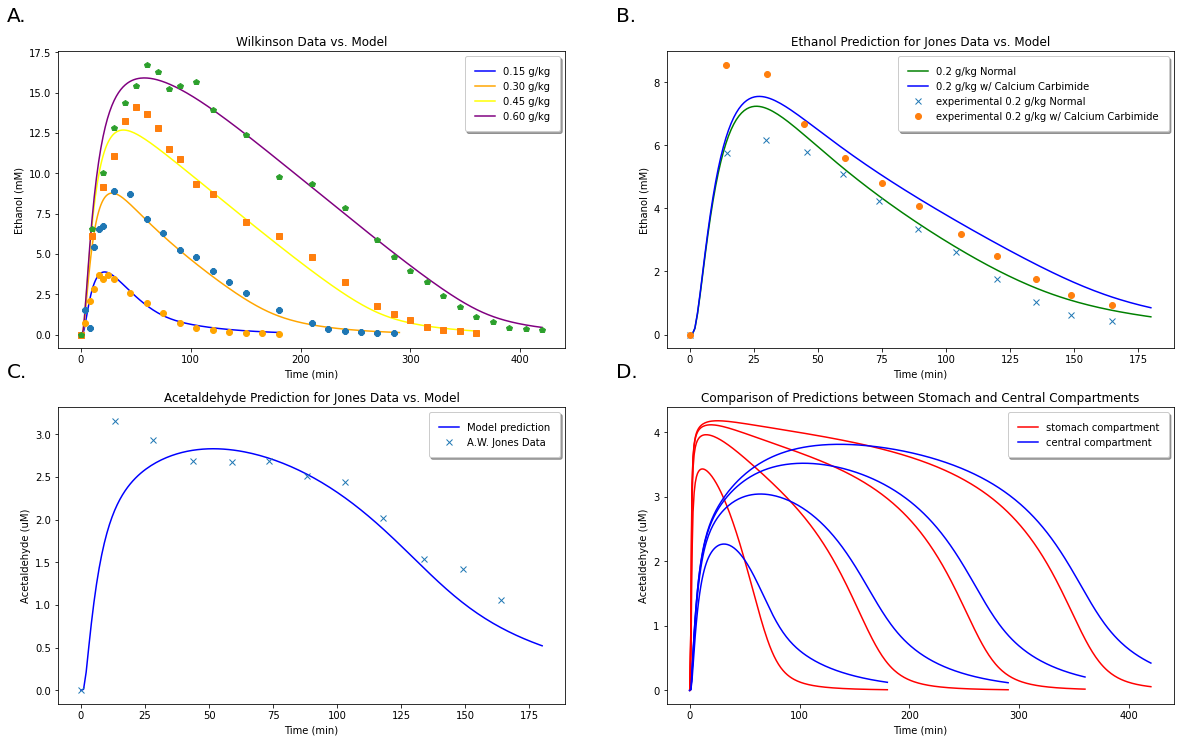

In [ ]:
#Plot of ethanol metabolism against different initial consumption 
#NOTE: We should include a figure legend within each plot that clearly identifies what each color/line represent! 
fig, axs = plt.subplots(2, 2, figsize=(20, 12)) 
axs[0, 0].plot(t1, sol1[:, 0], c='blue', label = '0.15 g/kg')
axs[0, 0].plot(t2, sol2[:, 0], c='orange', label = '0.30 g/kg')
axs[0, 0].plot(t3, sol3[:, 0], c='yellow', label = '0.45 g/kg')
axs[0, 0].plot(t4, sol4[:, 0], c='purple', label = '0.60 g/kg')
axs[0, 0].plot(df1[0], df1[1], 'o', c='orange')
axs[0, 0].plot(df2[0], df2[1], '8')
axs[0, 0].plot(df3[0], df3[1], 's')
axs[0, 0].plot(df4[0], df4[1], 'p')
axs[0, 0].set_xlabel('Time (min)')
axs[0, 0].set_ylabel('Ethanol (mM)')
axs[0, 0].set_title('Wilkinson Data vs. Model')
axs[0, 0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

# Plot of A.W. Jones ethanol data against our model
axs[0, 1].plot(t5, sol5[:, 0], 'green', label = '0.2 g/kg Normal') 
axs[0, 1].plot(t6, sol6[:, 0], 'blue', label = '0.2 g/kg w/ Calcium Carbimide')
axs[0, 1].plot(df6[0], df6[1], 'x', label = 'experimental 0.2 g/kg Normal')
axs[0, 1].plot(df7[0], df7[1], 'o', label = 'experimental 0.2 g/kg w/ Calcium Carbimide')
axs[0, 1].set_xlabel('Time (min)')
axs[0, 1].set_ylabel('Ethanol (mM)')
axs[0, 1].set_title('Ethanol Prediction for Jones Data vs. Model')
axs[0, 1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Plot of A.W. Jones acetaldehyde metabolism data against our model 
axs[1, 0].plot(t5, sol5[:, 1]*1000, 'blue', label = 'Model prediction')
axs[1, 0].plot(df5[0], df5[1]*1000, 'x', label = 'A.W. Jones Data')
axs[1, 0].set_xlabel('Time (min)')
axs[1, 0].set_ylabel('Acetaldehyde (uM)')
axs[1, 0].set_title('Acetaldehyde Prediction for Jones Data vs. Model')
axs[1, 0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Plot of acetaldehyde metabolism 
#What are these lines? What are we comparing here? 
axs[1, 1].plot(t1, sol1[:, 23]*1000, c='red', label = 'stomach compartment')
axs[1, 1].plot(t1, sol1[:,1]*1000, c = 'blue', label = 'central compartment')
axs[1, 1].plot(t2, sol2[:, 23]*1000, c='red')
axs[1, 1].plot(t2, sol2[:,1]*1000, c = 'blue')
axs[1, 1].plot(t3, sol3[:, 23]*1000, c='red')
axs[1, 1].plot(t3, sol3[:,1]*1000, c = 'blue')
axs[1, 1].plot(t4, sol4[:, 23]*1000, c='red')
axs[1, 1].plot(t4, sol4[:,1]*1000, c= 'blue')
axs[1, 1].set_xlabel('Time (min)')
axs[1, 1].set_ylabel('Acetaldehyde (uM)')
axs[1, 1].set_title('Comparison of Predictions between Stomach and Central Compartments')
axs[1, 1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

axs = axs.flat
for n, ax in enumerate(axs):
    ax.text(-0.1, 1.1, string.ascii_uppercase[n]+".", transform=ax.transAxes, 
            size=20 )


> #### Figure 4 
A.  Comparison of model predictions for ethanol concentrations at 4 different concentrations with data from Wilkinson et al. (1997). \
B. Model predictions for ethanol concentration with and without accounting for the reverse reaction. \
C. Comparison of model predictions for acetaldehyde levels with experimental values from A. W. Jones et al. (1998). \
D. Comparison of model predictions for acetaldehyde concentrations within two different compartments (the stomach and central compartments) at 0.15 g/kg, 0.30 g/kg, 0.45 g/kg, and 0.60 g/kg ethanol doses.


<img src="https://drive.google.com/uc?export=view&id=1aTOPt8AsB_2PMwjzp9KJ4_-_Oj1H0b7p">

> #### Figure 5 
Data taken from the Umulis (2005) paper for comparison with our model predictions in Figure 4. Figure 4.A correlates to Figure 5.B, 4.B with 5.C, and 4.C with 5.D. 

### Modeling Acetaldehyde Dehydrogenase (ALDH2) Deficiency 
Next, we wish to model people with an acetaldehdye dehydrogenase deficiency and repeat the results found by the paper. 

Individuals with a heterogenous $ALDH2^*1/^*2$ deficiency have only a $70%$ functional ALDH2 enzyme. For people with a $ALDH2^*2/^*2$ deficiency, this efficacy drops to only $55%$. Thus, we must must make adjustments to our variable that models $ALDH$ metabolism to encompass these changes. We will then compare our model data with existing data from Peng et al. (1999) for ethanol and acetaldehyde metabolism in people with these three different genotypes.

#### TASK 4: 

Redefine a parameter of the model as a list to encompass the three different $ALDH2$ genotypes: $ALDH2^*1/^*1$, $ALDH2^*1/^*2$, and $ALDH2^*2/^*2$.

In [ ]:
# Adjusting ??? Parameter for Reduced Efficiency of ALDH2. 
# ??? = [ , , ] # [ALDH2*1/*1, ALDH2*1/*2, ALDH2*2/*2] 

SOLUTION:

In [ ]:
#Adjusting Acetaldehyde Parameter for Reduced Efficiency  
VmaxAc1 = [2.7, 2.7*0.70, 2.7*0.550] # [ALDH2*1/*1, ALDH2*1/*2, ALDH2*2/*2] 

We then proceed with graphing a new set of solutions comparing these three genotypes:

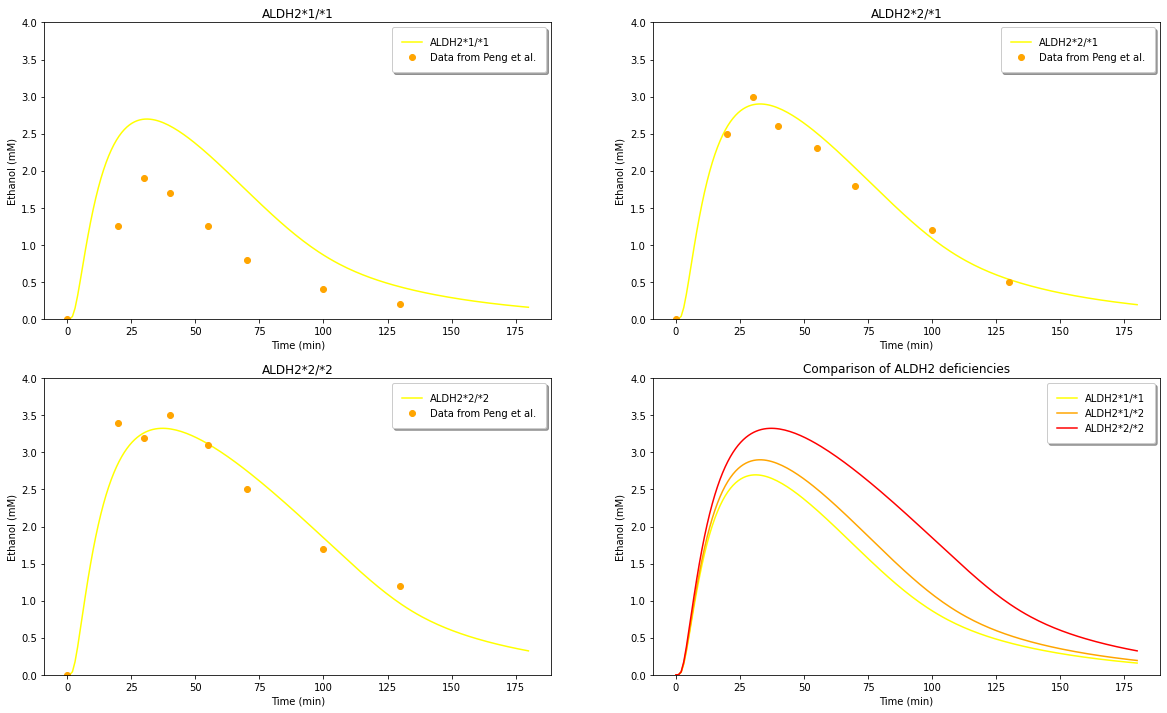

In [ ]:
#Generating Solutions: 
Vs1 = 0.15
Cs7 = 1797 #Peng et. al uses a 12.4g dose of ethanol, based on the average body weight of their test subjects
Ds7 = Vs1*Cs7
ks7 = 0.5*ke(Al,Ds7) #Stomach absorption rate is decreased by 50% due to subjects eating 2h prior to study
S7 = [Cs7, ks7, Vs1]
y7 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, S7[2]]
t7 = np.linspace(0,180,179)

sol7 = odeint(dAldt, np.array(y7), t7, args=(S7, VmaxAl, KmAl, VmaxAc1[0], KmAc, Rev, rAl)) #Sol for ALDH2*1/*1
sol8 = odeint(dAldt, np.array(y7), t7, args=(S7, VmaxAl, KmAl, VmaxAc1[1], KmAc, Rev, rAl)) #Sol for ALDH2*1/*2
sol9 = odeint(dAldt, np.array(y7), t7, args=(S7, VmaxAl, KmAl, VmaxAc1[2], KmAc, Rev, rAl)) #Sol for ALDH2*2/*2

#Comparing ALDH2*1/1 against model 
fig, axs = plt.subplots(2, 2, figsize=(20, 12)) 
axs[0, 0].plot(t1, sol7[:, 0], c='yellow', label = 'ALDH2*1/*1')
axs[0, 0].plot(df11e[0], df11e[1], 'o', c='orange', label = 'Data from Peng et al.') #fig3A
axs[0, 0].set_xlabel('Time (min)')
axs[0, 0].set_ylabel('Ethanol (mM)')
axs[0, 0].set_title('ALDH2*1/*1')
axs[0, 0].set_ylim([0,4])
axs[0, 0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Comparing ALDH2*2/*1 against model 
axs[0, 1].plot(t1, sol8[:, 0], c='yellow', label = 'ALDH2*2/*1')
axs[0, 1].plot(df21e[0], df21e[1], 'o', c='orange', label = 'Data from Peng et al.') #fig3B
axs[0, 1].set_xlabel('Time (min)')
axs[0, 1].set_ylabel('Ethanol (mM)')
axs[0, 1].set_title('ALDH2*2/*1')
axs[0, 1].set_ylim([0,4])
axs[0, 1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Comparing ALDH2*2/*2 against model 
axs[1, 0].plot(t1, sol9[:, 0], c='yellow', label = 'ALDH2*2/*2')
axs[1, 0].plot(df22e[0], df22e[1], 'o', c='orange', label = 'Data from Peng et al.')
axs[1, 0].set_xlabel('Time (min)')
axs[1, 0].set_ylabel('Ethanol (mM)')
axs[1, 0].set_title('ALDH2*2/*2')
axs[1, 0].set_ylim([0,4])
axs[1, 0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Plotting all three Deficiencies Together 
axs[1, 1].plot(t1, sol7[:, 0], c='yellow', label = 'ALDH2*1/*1')
axs[1, 1].plot(t1, sol8[:, 0], c='orange', label = 'ALDH2*1/*2')
axs[1, 1].plot(t1, sol9[:, 0], c='red', label = 'ALDH2*2/*2')
axs[1, 1].set_xlabel('Time (min)')
axs[1, 1].set_ylabel('Ethanol (mM)')
axs[1, 1].set_title('Comparison of ALDH2 deficiencies')
axs[1, 1].set_ylim([0,4])
axs[1, 1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)


> #### Figure 6 
A. Comparison of model predictions for ethanol levels with an $ALDH2*1/1$ genotype with experimental data from Peng et al. (1999). \
B. Comparison of model predictions for ethanol levels with an $ALDH2*2/1$ genotype with experimental data from Peng et al. (1999). \
C. Comparison of model predictions for ethanol levels with an $ALDH2*2/2$ genotype with experimental data from Peng et al. (1999). \
D. Comparison of ethanol level predictions between all three genotypes.  

We compare these results in Figure 6 with those of Figure 7 from the Umulis paper below. We observe that our model has a higher curve prediction that that of the model in the paper, but they otherwise exhibit similar shapes and trends. We believe the discrepancy may be due to the starting values of Vs1 and Cs1 chosen. 

<img src="https://drive.google.com/uc?export=view&id=1u0XBUQrX_ZKQQxFn3yiu7AG_ZzZ73Fcn">

> #### Figure 7 
Taken from the Umulis paper. Comparison of the original model's prediction for all three genotypes with data from Peng et al. (1999). 


### Comparison of Fasted vs. Fed States:

We further wish to compare our model predictions to those of the paper's for acetaldehyde levels among the three $ALDH2$ genotypes, and how the model can be adjusted to account for a fasted vs. fed state. 

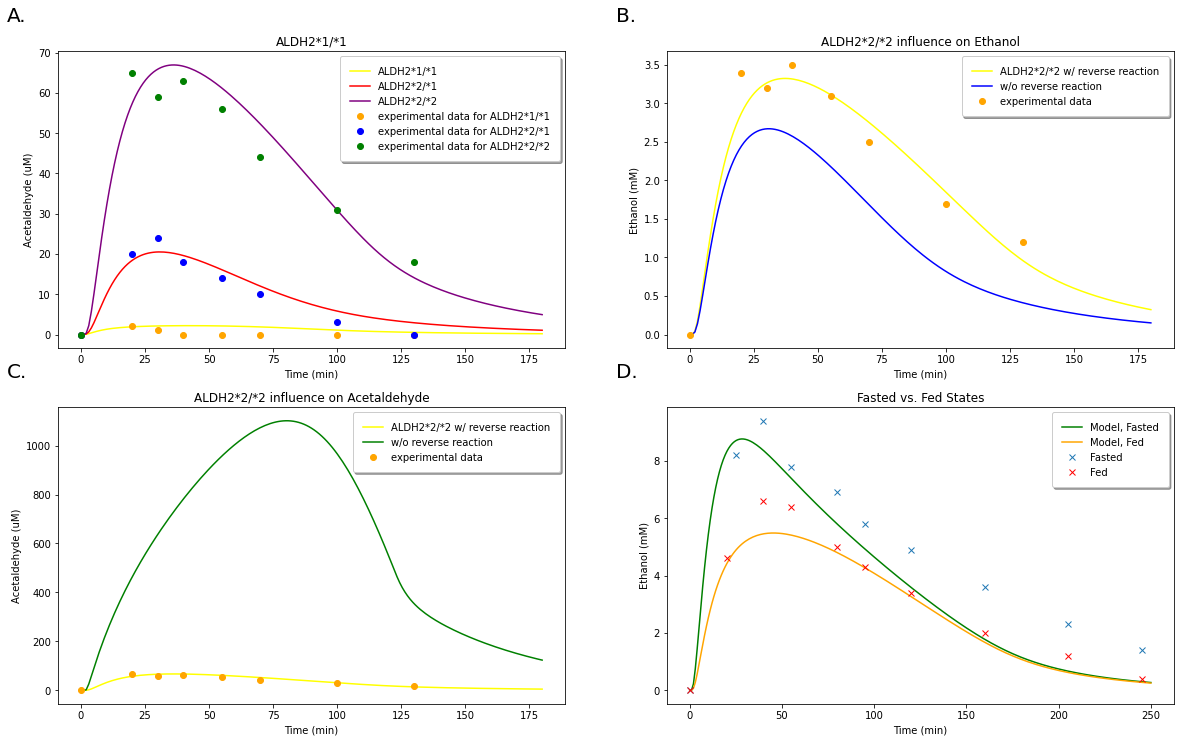

In [ ]:
#Generating Solutions for ALDH2*1/2 and ALDH2*2/2 without the reverse reactions: 
sol8r = odeint(dAldt, np.array(y7), t7, args=(S7, VmaxAl, KmAl, VmaxAc1[1], KmAc, Rev, rAlRev)) #ALDH2*1/2 
sol9r = odeint(dAldt, np.array(y7), t7, args=(S7, VmaxAl, KmAl, VmaxAc1[2], KmAc, Rev, rAlRev)) #ALDH2*2/2

#Paramters for Lucey et. all
Vs1 = 0.15 
Cs10 = 3017 # 0.30 g/kg ethanol dose 
Ds10 = Vs1*Cs10
ks10Fasted = ke(Al,Ds10)
ks10Fed = 0.5*ke(Al,Ds10) #Stomach absorption rate is decreased by 50% due to subjects eating 2h prior to study
S10Fasted = [Cs10, ks10Fasted, Vs1]
S10Fed = [Cs10, ks10Fed, Vs1]
y10Fasted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, S10Fasted[2]]
y10Fed = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, S10Fed[2]]
t10 = np.linspace(0,250,249)

#Generating solutions for Lucey et. all fasted and fed states:
sol10Fasted = odeint(dAldt, np.array(y10Fasted), t10, args=(S10Fasted, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAl))
sol10Fed = odeint(dAldt, np.array(y10Fed), t10, args=(S10Fed, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAl))

#Comparing ALDH2*1/1 against model 
fig, axs = plt.subplots(2, 2, figsize=(20, 12)) 
axs[0, 0].plot(t1, sol7[:, 1]*1000, c='yellow', label = 'ALDH2*1/*1')
axs[0, 0].plot(t1, sol8[:, 1]*1000, c='red', label = 'ALDH2*2/*1')
axs[0, 0].plot(t1, sol9[:, 1]*1000, c='purple', label = 'ALDH2*2/*2')
axs[0, 0].plot(df11a[0], df11a[1], 'o', c='orange', label = 'experimental data for ALDH2*1/*1') 
axs[0, 0].plot(df21a[0], df21a[1], 'o', c='blue', label = 'experimental data for ALDH2*2/*1') 
axs[0, 0].plot(df22a[0], df22a[1], 'o', c='green', label = 'experimental data for ALDH2*2/*2') 
axs[0, 0].set_xlabel('Time (min)')
axs[0, 0].set_ylabel('Acetaldehyde (uM)')
axs[0, 0].set_title('ALDH2*1/*1')
axs[0, 0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Comparing ALDH2*2/*2 against model 
axs[0, 1].plot(t1, sol9[:,0], c='yellow', label = 'ALDH2*2/*2 w/ reverse reaction')
axs[0, 1].plot(t1, sol9r[:,0], c='blue', label = 'w/o reverse reaction')
axs[0, 1].plot(df22e[0], df22e[1], 'o', c='orange', label = 'experimental data') 
axs[0, 1].set_xlabel('Time (min)')
axs[0, 1].set_ylabel('Ethanol (mM)')
axs[0, 1].set_title('ALDH2*2/*2 influence on Ethanol')
axs[0, 1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Comparing ALDH2*2/*2 against model 
axs[1, 0].plot(t1, sol9[:, 1]*1000, c='yellow', label = 'ALDH2*2/*2 w/ reverse reaction')
axs[1, 0].plot(t1, sol9r[:, 1]*1000, c='green', label = 'w/o reverse reaction')
axs[1, 0].plot(df22a[0], df22a[1], 'o', c='orange', label = 'experimental data') 
axs[1, 0].set_xlabel('Time (min)')
axs[1, 0].set_ylabel('Acetaldehyde (uM)')
axs[1, 0].set_title('ALDH2*2/*2 influence on Acetaldehyde')
axs[1, 0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Plotting all three Deficiencies Together 
axs[1, 1].plot(t10, sol10Fasted[:, 0], c='green', label = 'Model, Fasted')
axs[1, 1].plot(t10, sol10Fed[:, 0], c='orange', label = 'Model, Fed')
axs[1, 1].plot(dfLuceyFasted[0], dfLuceyFasted[1], 'x', label = 'Fasted')
axs[1, 1].plot(dfLuceyFed[0], dfLuceyFed[1], 'x', c = 'red', label = 'Fed')
axs[1, 1].set_xlabel('Time (min)')
axs[1, 1].set_ylabel('Ethanol (mM)')
axs[1, 1].set_title('Fasted vs. Fed States')
axs[1, 1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

axs = axs.flat
for n, ax in enumerate(axs):
    ax.text(-0.1, 1.1, string.ascii_uppercase[n]+".", transform=ax.transAxes, 
            size=20 )

> #### Figure 8 
A. Acetaldehyde level predictions for three different $ALDH2$ genotypes and ocmparison with experimental data from Peng et al. (1999). \
B.Predictions for ethanol levels with and without accounting for the reverse reaction of acetaldehyde back into ethanol in a person with an $ALDH2*2/2$ genotype. Comparison with experimental data from Peng et al. (1999). \
C.Predictions for acetaldehyde levels with and without accounting for the reverse reaction of acetaldehyde back into ethanol in a person with an $ALDH2*2/2$ genotype. Comparison with experimental data from Peng et al. (1999). \
D. Comparison of model predictions in a fasted vs. fed state with experimental results from Lucey et al. (1999). 

These results from Figure 8 can be direclty compared with those of Figure 9 from the original model. We see that, again, our model predicts much higher levels of acetaldehyde than those predicted by the Umulis model. Since our initial results were in great agreement with those of the Umulis model, we believe this discrepancy is due to some alteration with the parameters of initial ethanol concentrations used in the study. 

<img src="https://drive.google.com/uc?export=view&id=1Ocvj6Xk6HwPn43hl-0qW4aYfJSKCV-DX">

> #### Figure 9 
Taken from the Umulis paper. Demonstrating further model predictions for the three $ALDH2$ genotypes along with comparison of fasting vs. fed states as conducted in Figure 8. 

## Model Expansion

### Influence of Medications on Ethanol Metabolism
Finally, we are interested in determining how ethanol metabolism can be influenced by certain medications. Here, we construct alterations to our model that will enable us to view the effects of acetominophen, aspirin, and salicylates on ethanol metabolism. 

#### Modeling Approach 
It has been shown that acetaminophen, aspirin, and its major metabolite salicylate are capable of inhibiting both $ADH$ as well as $ALDH$ (Lee et al., 2013; Lee et al., 2015). We therefore approach modeling the effects of these medications by incorporating an inhibition term in our Michaelis-Menten kinetic equations for $ADH$ and $ALDH$. 
We utilize kinetic parameters measured for 4 different doses of acetaminophen: a therapeutic dose of 0.2 mM, a slightly higher but still subtoxic concentration of 0.5 mM, and a toxic level of 1.0 mM and 1.5 mM. Additionally, we make the following assumptions: 
1. All classes of $ADH$ exert equal influence on ethanol metabolism in this model. 
2. Since our model only considers $ALDH2$ for acetaldehdye metabolism, the effects of $ALDH1A1$ are discarded. 

We begin by computing our new Michaelis-Menten equations for each medication that reflect three types of inhibition: competitive, noncompetitive, and uncompetitive. 

The equations for the Competitive Inhibition, Noncompetitive Inhibition, and Uncompetitive Inhibition, respectively, are: 

$v_{comp} = (V_{max} * S)/ [K_m (1+ I/K_{is}) + S] $ 

$v_{noncomp} = (V_{max} * S)/ [K_m (1+ I/K_{is}) + S (1 + I/K_{ii})] $ 

$v_{uncomp} = (V_{max} * S)/ [K_m + S (1 + I/K_{ii})] $ 

where $K_{is}$ and $K_{ii}$ are the slope and intercept inhibition constants. 




#### TASK 5:
We are given the following information regarding the inhibition of acetaminophen, aspirin, and salicylate on $ADH$ and $ALDH2$: 

* Acetaminophen displays noncompetitive inhibition on both $ADH$ and $ALDH2$. 
* It is known that aspirin exhibits competitive inhibition on 6 types of $ADH$, but noncompetitive inhibition on  2 $ADH$. It interacts with $ALDH2$ in an uncompetitive way. 
* Salicylates exhibit competitive inhibition on 7 $ADH$, but noncompetitive inhibition on the remaining 2. It exhibits noncompetitive inhibition on $ALDH2$. 

Recall the initial Michaelis-Menten kinetic equations for $ADH$ and $ALDH2$ (ethanol and acetaldehyde metabolism, respectively). Given the above information, make adjustments to the functions $rAl$ and $rAc$ to generate new ethanol and acetaldehyde functions to model the effects of acetaminophen, aspirin, and salicylates. We define the additional variables $Kisc$, $Kisnc$, and $Kiincu$ to reflect inhibition constants used from competitive, noncompetitive, and noncompetitive or uncompetitive inhibition respectively (not all constants will be used in every function). 


In [ ]:
# Recall our initial Michaelis-Menten equations: 
# Rate Law for Ethanol Metabolism: 
def rAl(CAl,CAc,VmAl,KmAl,VrevAl,KrevAl):
  rAl = (-VmAl*CAl+VrevAl*CAc)/(KmAl+CAl+KrevAl*CAc)
  return rAl

# Rate Law for Acetaldehyde Metabolism: 
def rAc(CAc,VmAc,KmAc):
  rAc = -CAc*VmAc/(KmAc+CAc)
  return rAc


In [ ]:
#Define new Kinetic Functions:  

'''
# For Acetaminophen ADH Kinetics 
def rAlACE(CAl,CAc,VmAl,KmAl,VrevAl,KrevAl,I, Kisc, Kisnc, Kiincu):

  return rAlACE

# Acetaminophen ALDH2 kinetics
def rAcACE(CAc,VmAc,KmAc, I, Kisnc, Kiincu):

  return rAcACE

# For Aspirin ADH Kinetics 
def rAlASP(CAl,CAc,VmAl,KmAl,VrevAl,KrevAl,I, Kisc, Kisnc, Kiincu):

  return rAlASP

# Aspirin ALDH2 kinetics 
def rAcASP(CAc,VmAc,KmAc, I, Kisnc, Kiincu):

  return rAcASP

# For Salicylate ADH Kinetics: 
def rAlSAL(CAl,CAc,VmAl,KmAl,VrevAl,KrevAl,I, Kisc, Kisnc, Kiincu):

    return rAlSAL

# Salicylate ALDH2 kinetics 
def rAcSAL(CAc,VmAc,KmAc, I, Kisnc, Kiincu):

  return rAcSAL

'''


'\n# For Acetaminophen ADH Kinetics \ndef rAlACE(CAl,CAc,VmAl,KmAl,VrevAl,KrevAl,I, Kisc, Kisnc, Kiincu):\n\n  return rAlACE\n\n# Acetaminophen ALDH2 kinetics\ndef rAcACE(CAc,VmAc,KmAc, I, Kisnc, Kiincu):\n\n  return rAcACE\n\n# For Aspirin ADH Kinetics \ndef rAlASP(CAl,CAc,VmAl,KmAl,VrevAl,KrevAl,I, Kisc, Kisnc, Kiincu):\n\n  return rAlASP\n\n# Aspirin ALDH2 kinetics \ndef rAcASP(CAc,VmAc,KmAc, I, Kisnc, Kiincu):\n\n  return rAcASP\n\n# For Salicylate ADH Kinetics: \ndef rAlSAL(CAl,CAc,VmAl,KmAl,VrevAl,KrevAl,I, Kisc, Kisnc, Kiincu):\n\n    return rAlSAL\n\n# Salicylate ALDH2 kinetics \ndef rAcSAL(CAc,VmAc,KmAc, I, Kisnc, Kiincu):\n\n  return rAcSAL\n\n'

In [ ]:
#Defining Kinetic Functions 

#For Acetaminophen ADH Kinetics 
def rAlACE(CAl,CAc,VmAl,KmAl,VrevAl,KrevAl,I, Kisc, Kisnc, Kiincu):
  #Noncompetitive Inhibition 
  #Kis2 = 0
  rAlACE = (-VmAl*CAl+VrevAl*CAc)/(KmAl*(1+I/Kisnc)+CAl*(1+I/Kiincu)+KrevAl*CAc)
  return rAlACE

# For Acetaminophen ALDH2 kinetics
def rAcACE(CAc,VmAc,KmAc, I, Kisnc, Kiincu):
  #Noncompetitive Inhibition 
  rAcACE = -CAc*VmAc/(KmAc*(1+I/Kisnc)+CAc*(1+I/Kiincu))
  return rAcACE

#For Aspirin ADH Kinetics 
def rAlASP(CAl,CAc,VmAl,KmAl,VrevAl,KrevAl,I, Kisc, Kisnc, Kiincu):
  #Competitive 
  rAlC = (-VmAl*CAl+VrevAl*CAc)/(KmAl*(1+I/Kisc)+CAl+KrevAl*CAc)

  #Noncompetitive 
  rAlNC = (-VmAl*CAl+VrevAl*CAc)/(KmAl*(1+I/Kisnc)+CAl*(1+I/Kiincu)+KrevAl*CAc)

  #Add Weights (6 Comp + 2 NonComp)
  rAlASP = ((6*rAlC + 2*rAlNC) /8)

  return rAlASP

# Aspirin ALDH2 kinetics 
def rAcASP(CAc,VmAc,KmAc, I, Kisnc, Kiincu):
  #Kis = 0
  #Uncompetitive
  rAcASP = -CAc*VmAc/(KmAc + CAc*(1+I/Kiincu))
  return rAcASP

# For Salicylates ADH Kinetics: 
def rAlSAL(CAl,CAc,VmAl,KmAl,VrevAl,KrevAl,I, Kisc, Kisnc, Kiincu):
    #Competitive 
    rAlC = (-VmAl*CAl+VrevAl*CAc)/(KmAl*(1+I/Kisc)+CAl+KrevAl*CAc)

    #Noncompetitive 
    rAlNC = (-VmAl*CAl+VrevAl*CAc)/(KmAl*(1+I/Kisnc)+CAl*(1+I/Kiincu)+KrevAl*CAc)

    #Add Weights (6 Comp + 2 NonComp)
    rAlSAL = ((7*rAlC + 2*rAlNC) /9)
    return rAlSAL

# Salicylates ALDH2 kinetics 
def rAcSAL(CAc,VmAc,KmAc, I, Kisnc, Kiincu):
  #Noncompetitive 
  rAcSAL = -CAc*VmAc/(KmAc*(1+I/Kisnc)+CAc*(1+I/Kiincu))
  return rAcSAL


In [ ]:
# Defining new metabolism function to reflect inhibitions by medication: 
def dAldtMed(y, t, S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlMed, rAcMed, I, Kis1al, Kis2al, Kiial, Kisac, Kiiac):
  Cs = S1[0]     # Concentration of ethanol in the stomach at t=0
  ks = S1[1]     # Rate constant for metabolizing ethanol in the stomach 
  Vs = S1[2]     # Maximum rate of metabolism in the stomach 

  Vrev = Rev[0];
  Krev = Rev[1];

  dAldtMed = [(-vl*(y[0]-y[22])-vm*(y[0]-y[2]))/Vc,  #1
           
          (-vl*(y[1]-y[23])-vm*(y[1]-y[3]))/Vc,   #2

          (Vm*(y[0]-y[2]))/Vm,                        #3
        
          (vm*(y[1]-y[3]))/Vm,                        #4
    
          (vl*((1/3)*y[0]+(2/3)*y[24]-y[4])+rAlMed(y[4],y[5],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl)/dVl,      #5
         
          (vl*((1/3)*y[1]+(2/3)*y[25]-y[5])-rAlMed(y[4],y[5],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl+rAcMed(y[5],VmaxAc,KmAc, I, Kisac, Kiiac)*dVl)/dVl,      #6
         
          (vl*(y[4]-y[6])+rAlMed(y[6],y[7],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl)/dVl,        #7
         
          (vl*(y[5]-y[7])-rAlMed(y[6],y[7],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl+rAcMed(y[7], VmaxAc, KmAc, I, Kisac, Kiiac)*dVl)/dVl,      #8
         
          (vl*(y[6]-y[8])+rAlMed(y[8],y[9],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl)/dVl,      #9
         
          (vl*(y[7]-y[9])-rAlMed(y[8],y[9],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl+rAcMed(y[9],VmaxAc,KmAc, I, Kisac, Kiiac)*dVl)/dVl,      #10
         
          (vl*(y[8]-y[10])+rAlMed(y[10],y[11],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl)/dVl,       #11
         
          (vl*(y[9]-y[11])-rAlMed(y[10],y[11],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl+rAcMed(y[11],VmaxAc,KmAc, I, Kisac, Kiiac)*dVl)/dVl,      #12
         
          (vl*(y[10]-y[12])+rAlMed(y[12],y[13],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl)/dVl,       #13
         
          (vl*(y[11]-y[13])-rAlMed(y[12],y[13],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl+rAcMed(y[13],VmaxAc,KmAc, I, Kisac, Kiiac)*dVl)/dVl,      #14
         
          (vl*(y[12]-y[14])+rAlMed(y[14],y[15],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl)/dVl,       #15
         
          (vl*(y[13]-y[15])-rAlMed(y[14],y[15],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl+rAcMed(y[15],VmaxAc,KmAc, I, Kisac, Kiiac)*dVl)/dVl,      #16
         
          (vl*(y[14]-y[16])+rAlMed(y[16],y[17],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl)/dVl,       #17
         
          (vl*(y[15]-y[17])-rAlMed(y[16],y[17],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl+rAcMed(y[17],VmaxAc,KmAc, I, Kisac, Kiiac)*dVl)/dVl,      #18
         
          (vl*(y[16]-y[18])+rAlMed(y[18],y[19],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl)/dVl,       #19
         
          (vl*(y[17]-y[19])-rAlMed(y[18],y[19],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl+rAcMed(y[19],VmaxAc,KmAc, I, Kisac, Kiiac)*dVl)/dVl,      #20
         
          (vl*(y[18]-y[20])+rAlMed(y[20],y[21],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl)/dVl,       #21
         
          (vl*(y[19]-y[21])-rAlMed(y[20],y[21],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl+rAcMed(y[21],VmaxAc,KmAc, I, Kisac, Kiiac)*dVl)/dVl,      #22
         
          (vl*(y[20]-y[22])+rAlMed(y[22],y[23],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl)/dVl,       #23
         
          (vl*(y[21]-y[23])-rAlMed(y[22],y[23],VmaxAl,KmAl,Vrev,Krev, I, Kis1al, Kis2al, Kiial)*dVl+rAcMed(y[23],VmaxAc,KmAc, I, Kisac, Kiiac)*dVl)/dVl,      #24  
         
          ((2/3)*vl*(y[0]-y[24])+ks*Cs*y[26])/Vg,      #25
         
          ((2/3)*vl*(y[1]-y[25]))/Vg,      #26
        
          -ks*y[26],     #27
          
           ]       

  return np.array(dAldtMed)


In Lee et al. (2013; 2015), kinetic constants were measured folllowing administration of 2 mM ethanol in vitro. It has been reported that peak blood alcohol levels reach 2 mM following ingenstion of 0.2 g/kg ethanol (Yin et al, 2010). Thus, we use a 0.2 g/kg dose of ethanol for generating our model predictions below. Additionally, we examine the effects of inhibitions of therapeutic doses of 0.2 mM and 0.5 mM, in addition to toxic levels of 1.0 and 1.5 mM medication. 

In [ ]:
#Now we solve the equation and plot: 
#Inhibition Concentrations: 
I = [0, 0.2, 0.5, 1.0, 1.5]

KAlACE = [0, 9.175, 9.42] #Kisc, Kisnc, Kiincu in MM
KAlASP = [30.14, 31, 37.5] #Kisc, Kisnc, Kiincu in MM
KAlSAL = [2.53428, 2, 2.85] #Kisc, Kisnc, Kiincu in MM

KAcACE = [3.0, 2.2] #Kisnc, Kiincu
KAcASP = [0, 3.9] #Kiiu
KAcSAL = [0.37, 0.55] #Kisnc, Kiincu

VmaxAl = 2.2047
VmaxAc = 2.7274

#Stomach Parameters for the Introduction of Aspirin:
Vs1 = 0.15;   # Volume of starting dose (g/kg) of ethanol                 
Cs1 = 1506;   # Concentration of ethanol in the stomach @ t=0 (mM) used in Lee                  
Ds1 = Vs1*Cs1;   #Initial dose of ethanol in the stomach (mM*g/kg)           
ks1 = ke(Al, Ds1);  # Equation for ks as a function of initial dose Ds1  
S1 = [Cs1, ks1, Vs1]; #Stomach parameter Vector 

#Solutions for each Medication: 
y0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, S1[2]]
t1 = np.linspace(0, 180, 179)

#Acetaminophen Solutions 
acetSolACE1= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlACE, rAcACE, I[0], KAlACE[0], KAlACE[1], KAlACE[2], KAcACE[0], KAcACE[1]))
acetSolACE2= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlACE, rAcACE, I[1], KAlACE[0], KAlACE[1], KAlACE[2], KAcACE[0], KAcACE[1]))
acetSolACE3= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlACE, rAcACE, I[2], KAlACE[0], KAlACE[1], KAlACE[2], KAcACE[0], KAcACE[1]))
acetSolACE4= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlACE, rAcACE, I[3], KAlACE[0], KAlACE[1], KAlACE[2], KAcACE[0], KAcACE[1]))
acetSolACE5= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlACE, rAcACE, I[4], KAlACE[0],KAlACE[1], KAlACE[2], KAcACE[0], KAcACE[1]))

#Aspirin Solutions 
acetSolASP1= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlASP, rAcASP, I[0], KAlASP[0], KAlASP[1], KAlASP[2], KAcASP[0], KAcASP[1]))
acetSolASP2= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlASP, rAcASP, I[1], KAlASP[0], KAlASP[1], KAlASP[2], KAcASP[0], KAcASP[1]))
acetSolASP3= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlASP, rAcASP, I[2], KAlASP[0], KAlASP[1], KAlASP[2], KAcASP[0], KAcASP[1]))
acetSolASP4= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlASP, rAcASP, I[3], KAlASP[0], KAlASP[1], KAlASP[2], KAcASP[0], KAcASP[1]))
acetSolASP5= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlASP, rAcASP, I[4], KAlASP[0], KAlASP[1], KAlASP[2], KAcASP[0], KAcASP[1]))

#Salicylate Solutions 
acetSolSAL1= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlSAL, rAcSAL, I[0], KAlSAL[0], KAlSAL[1], KAlSAL[2], KAcSAL[0], KAcSAL[1]))
acetSolSAL2= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlSAL, rAcSAL, I[1], KAlSAL[0], KAlSAL[1], KAlSAL[2], KAcSAL[0], KAcSAL[1]))
acetSolSAL3= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlSAL, rAcSAL, I[2], KAlSAL[0], KAlSAL[1], KAlSAL[2], KAcSAL[0], KAcSAL[1]))
acetSolSAL4= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlSAL, rAcSAL, I[3], KAlSAL[0], KAlSAL[1], KAlSAL[2], KAcSAL[0], KAcSAL[1]))
acetSolSAL5= odeint(dAldtMed, np.array(y0), t1, args=(S1, VmaxAl, KmAl, VmaxAc, KmAc, Rev, rAlSAL, rAcSAL, I[4], KAlSAL[0], KAlSAL[1], KAlSAL[2], KAcSAL[0], KAcSAL[1]))


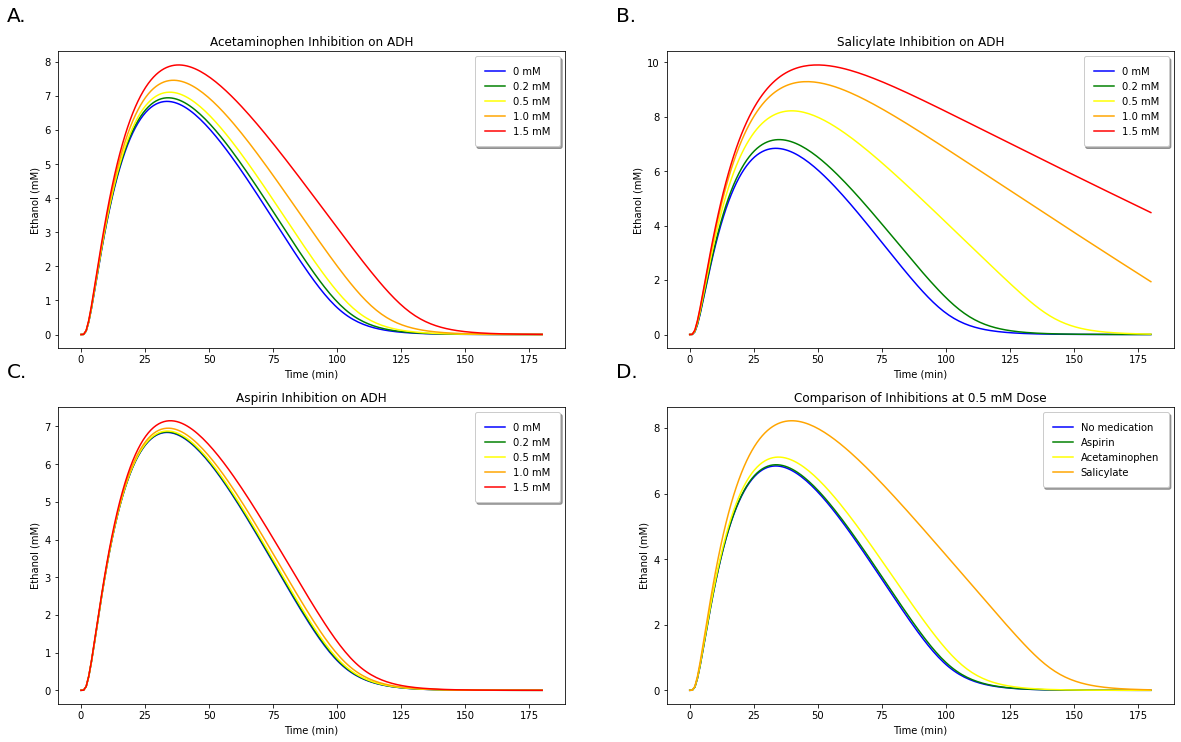

In [ ]:
#Plotting 
#Plotting Acetaminophen Solutions 
fig, axs = plt.subplots(2, 2, figsize=(20, 12)) 
axs[0, 0].plot(t1, acetSolACE1[:, 0], c='blue', label = '0 mM')
axs[0, 0].plot(t1, acetSolACE2[:, 0], c='green', label = '0.2 mM')
axs[0, 0].plot(t1, acetSolACE3[:, 0], c='yellow', label = '0.5 mM')
axs[0, 0].plot(t1, acetSolACE4[:, 0], c='orange', label = '1.0 mM')
axs[0, 0].plot(t1, acetSolACE5[:, 0], c='red', label = '1.5 mM')
axs[0, 0].set_xlabel('Time (min)')
axs[0, 0].set_ylabel('Ethanol (mM)')
axs[0, 0].set_title('Acetaminophen Inhibition on ADH')
axs[0, 0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Plotting Aspirin Solutions 
axs[1, 0].plot(t1, acetSolASP1[:, 0], c='blue', label = '0 mM')
axs[1, 0].plot(t1, acetSolASP2[:, 0], c='green', label = '0.2 mM')
axs[1, 0].plot(t1, acetSolASP3[:, 0], c='yellow', label = '0.5 mM')
axs[1, 0].plot(t1, acetSolASP4[:, 0], c='orange', label = '1.0 mM')
axs[1, 0].plot(t1, acetSolASP5[:, 0], c='red', label = '1.5 mM')
axs[1, 0].set_xlabel('Time (min)')
axs[1, 0].set_ylabel('Ethanol (mM)')
axs[1, 0].set_title('Aspirin Inhibition on ADH')
axs[1, 0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Plotting Salicylate Solutions
axs[0, 1].plot(t1, acetSolSAL1[:, 0], c='blue', label = '0 mM')
axs[0, 1].plot(t1, acetSolSAL2[:, 0], c='green', label = '0.2 mM')
axs[0, 1].plot(t1, acetSolSAL3[:, 0], c='yellow', label = '0.5 mM')
axs[0, 1].plot(t1, acetSolSAL4[:, 0], c='orange', label = '1.0 mM')
axs[0, 1].plot(t1, acetSolSAL5[:, 0], c='red', label = '1.5 mM')
axs[0, 1].set_xlabel('Time (min)')
axs[0, 1].set_ylabel('Ethanol (mM)')
axs[0, 1].set_title('Salicylate Inhibition on ADH')
axs[0, 1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Plotting Solutions Together 
axs[1, 1].plot(t1, acetSolACE1[:, 0], c='blue', label = 'No medication')
axs[1, 1].plot(t1, acetSolASP3[:, 0], c='green', label = 'Aspirin')
axs[1, 1].plot(t1, acetSolACE3[:, 0], c='yellow', label = 'Acetaminophen')
axs[1, 1].plot(t1, acetSolSAL3[:, 0], c='orange', label = 'Salicylate')
axs[1, 1].set_xlabel('Time (min)')
axs[1, 1].set_ylabel('Ethanol (mM)')
axs[1, 1].set_title('Comparison of Inhibitions at 0.5 mM Dose')
axs[1, 1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

axs = axs.flat
for n, ax in enumerate(axs):
    ax.text(-0.1, 1.1, string.ascii_uppercase[n]+".", transform=ax.transAxes, 
            size=20 )

> #### Figure 10 
A. Demonstration of increasing concentrations of acetaminophen on inhibiting ethanol metabolism. \
B. Demonstration of increasing concentrations of aspirin on inhibiting ethanol metabolism. \
C. Demonstration of increasing concentrations of salicylate on inhibiting ethanol metabolism. \
D. Comparison of inhibition occuring between all three medications at 0.5 mM doses. 

The results for the differing inhibitions of acetmaminophen, aspirin, and salicylate are demonstrated in Figure 10 above. Figure 10. D clearly demonstrates that salicylate produces the highest amount of inhibition, while acetaminophen produces slightly more inhibition than aspirin. 

### Finding percent difference of these solution through integration:

In order to determine the validity of our model predictions with those observed experimentally, we must be able to compute the percent change of the ethanol metabolism curve. 
Simpson and trapz are two simple integration packages available in python. We can compare them both here by passing the arguments of the solution and the x values, as shown below.

In [ ]:
area1 = trapz(acetSolACE1[:,0], t1)
area12 = simpson(acetSolACE1[:,0], t1)
area2 = trapz(acetSolACE2[:,0], t1)
area22 = simpson(acetSolACE2[:,0], t1)
area3 = trapz(acetSolACE3[:,0], t1)
area32 = simpson(acetSolACE3[:,0], t1)
area4 = trapz(acetSolACE4[:,0], t1)
area42 = simpson(acetSolACE4[:,0], t1)
area5 = trapz(acetSolACE5[:,0], t1)
area52 = simpson(acetSolACE5[:,0], t1)

# print("acetSolACE1 area: ", area1, area12) #uncomment these lines to compare the area output by each method for the graphs
# print("acetSolACE2 area: ", area2, area22)
# print("acetSolACE3 area: ", area3, area32)
# print("acetSolACE4 area: ", area4, area42)
# print("acetSolACE5 area: ", area5, area52)

diff1 = area2/area1
diff2 = area3/area1
diff3 = area4/area1
diff4 = area5/area1

diff1String = "The percent difference in area under the curve between 0 and 0.2 mM Acetaminophen is " + str("{:.2f}".format(diff1*100-100)) + "%."
diff2String = "The percent difference in area under the curve between 0 and 0.5 mM Acetaminophen is " + str("{:.2f}".format(diff2*100-100)) + "%."
diff3String = "The percent difference in area under the curve between 0 and 1.0 mM Acetaminophen is " + str("{:.2f}".format(diff3*100-100)) + "%."
diff4String = "The percent difference in area under the curve between 0 and 1.5 mM Acetaminophen is " + str("{:.2f}".format(diff4*100-100)) + "%."

print(diff1String)
print(diff2String)
print(diff3String)
print(diff4String)

### For Aspirin: 
area1 = trapz(acetSolASP1[:,0], t1)
area12 = simpson(acetSolASP1[:,0], t1)
area2 = trapz(acetSolASP2[:,0], t1)
area22 = simpson(acetSolASP2[:,0], t1)
area3 = trapz(acetSolASP3[:,0], t1)
area32 = simpson(acetSolASP3[:,0], t1)
area4 = trapz(acetSolASP4[:,0], t1)
area42 = simpson(acetSolASP4[:,0], t1)
area5 = trapz(acetSolASP5[:,0], t1)
area52 = simpson(acetSolASP5[:,0], t1)

diff1 = area2/area1
diff2 = area3/area1
diff3 = area4/area1
diff4 = area5/area1

diff1String = "The percent difference in area under the curve between 0 and 0.2 mM Aspirin is " + str("{:.2f}".format(diff1*100-100)) + "%."
diff2String = "The percent difference in area under the curve between 0 and 0.5 mM Aspirin is " + str("{:.2f}".format(diff2*100-100)) + "%."
diff3String = "The percent difference in area under the curve between 0 and 1.0 mM Aspirin is " + str("{:.2f}".format(diff3*100-100)) + "%."
diff4String = "The percent difference in area under the curve between 0 and 1.5 mM Aspirin is " + str("{:.2f}".format(diff4*100-100)) + "%."

print(diff1String)
print(diff2String)
print(diff3String)
print(diff4String)

### For Salicylates 
area1 = trapz(acetSolSAL1[:,0], t1)
area12 = simpson(acetSolSAL1[:,0], t1)
area2 = trapz(acetSolSAL2[:,0], t1)
area22 = simpson(acetSolSAL2[:,0], t1)
area3 = trapz(acetSolSAL3[:,0], t1)
area32 = simpson(acetSolSAL3[:,0], t1)
area4 = trapz(acetSolSAL4[:,0], t1)
area42 = simpson(acetSolSAL4[:,0], t1)
area5 = trapz(acetSolSAL5[:,0], t1)
area52 = simpson(acetSolSAL5[:,0], t1)

diff1 = area2/area1
diff2 = area3/area1
diff3 = area4/area1
diff4 = area5/area1

diff1String = "The percent difference in area under the curve between 0 and 0.2 mM Salicylates is " + str("{:.2f}".format(diff1*100-100)) + "%."
diff2String = "The percent difference in area under the curve between 0 and 0.5 mM Salicylates is " + str("{:.2f}".format(diff2*100-100)) + "%."
diff3String = "The percent difference in area under the curve between 0 and 1.0 mM Salicylates is " + str("{:.2f}".format(diff3*100-100)) + "%."
diff4String = "The percent difference in area under the curve between 0 and 1.5 mM Salicylates is " + str("{:.2f}".format(diff4*100-100)) + "%."

print(diff1String)
print(diff2String)
print(diff3String)
print(diff4String)

The percent difference in area under the curve between 0 and 0.2 mM Acetaminophen is 3.73%.
The percent difference in area under the curve between 0 and 0.5 mM Acetaminophen is 9.77%.
The percent difference in area under the curve between 0 and 1.0 mM Acetaminophen is 23.52%.
The percent difference in area under the curve between 0 and 1.5 mM Acetaminophen is 44.46%.
The percent difference in area under the curve between 0 and 0.2 mM Aspirin is 0.48%.
The percent difference in area under the curve between 0 and 0.5 mM Aspirin is 1.35%.
The percent difference in area under the curve between 0 and 1.0 mM Aspirin is 3.95%.
The percent difference in area under the curve between 0 and 1.5 mM Aspirin is 10.90%.
The percent difference in area under the curve between 0 and 0.2 mM Salicylates is 11.65%.
The percent difference in area under the curve between 0 and 0.5 mM Salicylates is 64.79%.
The percent difference in area under the curve between 0 and 1.0 mM Salicylates is 151.90%.
The percent

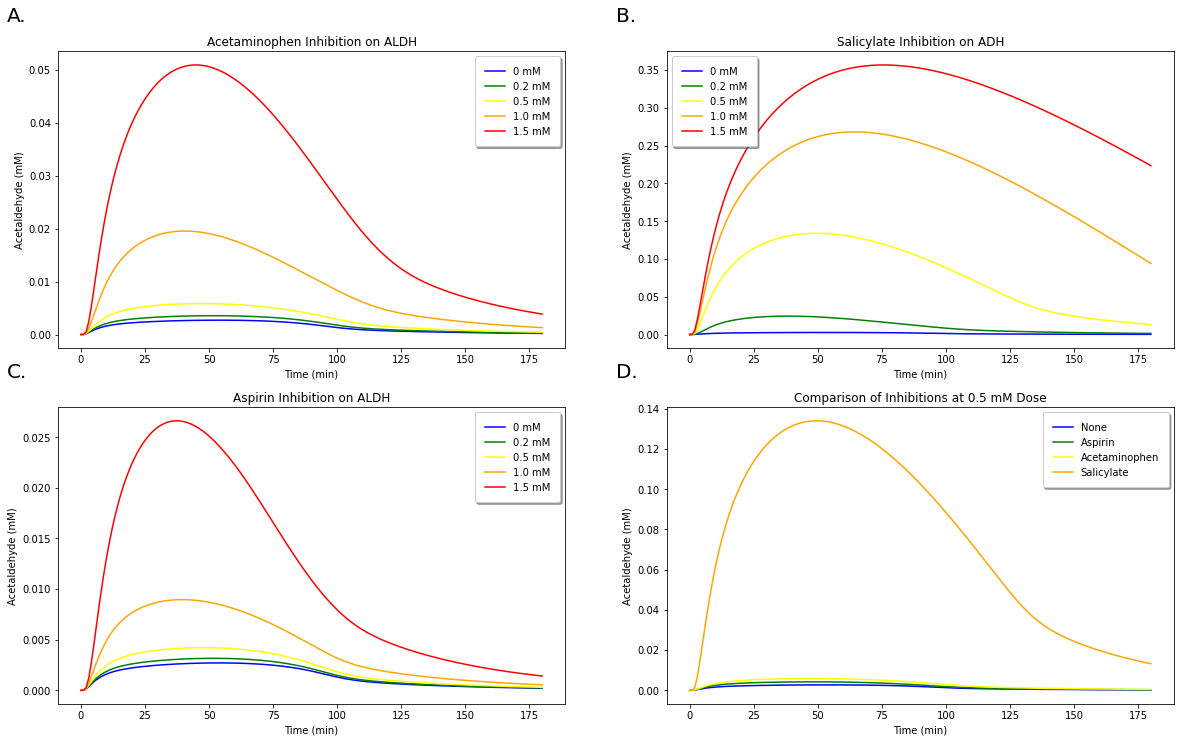

In [ ]:
#Plotting 
#Plotting Acetaminophen Solutions 
fig, axs = plt.subplots(2, 2, figsize=(20, 12)) 
axs[0, 0].plot(t1, acetSolACE1[:, 1], c='blue', label = '0 mM')
axs[0, 0].plot(t1, acetSolACE2[:, 1], c='green', label = '0.2 mM')
axs[0, 0].plot(t1, acetSolACE3[:, 1], c='yellow', label = '0.5 mM')
axs[0, 0].plot(t1, acetSolACE4[:, 1], c='orange', label = '1.0 mM')
axs[0, 0].plot(t1, acetSolACE5[:, 1], c='red', label = '1.5 mM')
axs[0, 0].set_xlabel('Time (min)')
axs[0, 0].set_ylabel('Acetaldehyde (mM)')
axs[0, 0].set_title('Acetaminophen Inhibition on ALDH')
axs[0, 0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Plotting Aspirin Solutions 
axs[1, 0].plot(t1, acetSolASP1[:, 1], c='blue', label = '0 mM')
axs[1, 0].plot(t1, acetSolASP2[:, 1], c='green', label = '0.2 mM')
axs[1, 0].plot(t1, acetSolASP3[:, 1], c='yellow', label = '0.5 mM')
axs[1, 0].plot(t1, acetSolASP4[:, 1], c='orange', label = '1.0 mM')
axs[1, 0].plot(t1, acetSolASP5[:, 1], c='red', label = '1.5 mM')
axs[1, 0].set_xlabel('Time (min)')
axs[1, 0].set_ylabel('Acetaldehyde (mM)')
axs[1, 0].set_title('Aspirin Inhibition on ALDH')
axs[1, 0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Plotting Salicylate Solutions
axs[0, 1].plot(t1, acetSolSAL1[:, 1], c='blue', label = '0 mM')
axs[0, 1].plot(t1, acetSolSAL2[:, 1], c='green', label = '0.2 mM')
axs[0, 1].plot(t1, acetSolSAL3[:, 1], c='yellow', label = '0.5 mM')
axs[0, 1].plot(t1, acetSolSAL4[:, 1], c='orange', label = '1.0 mM')
axs[0, 1].plot(t1, acetSolSAL5[:, 1], c='red', label = '1.5 mM')
axs[0, 1].set_xlabel('Time (min)')
axs[0, 1].set_ylabel('Acetaldehyde (mM)')
axs[0, 1].set_title('Salicylate Inhibition on ADH')
axs[0, 1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

#Plotting Solutions Together 
axs[1, 1].plot(t1, acetSolACE1[:, 1], c='blue', label = 'None')
axs[1, 1].plot(t1, acetSolASP3[:, 1], c='green', label = 'Aspirin')
axs[1, 1].plot(t1, acetSolACE3[:, 1], c='yellow', label = 'Acetaminophen')
axs[1, 1].plot(t1, acetSolSAL3[:, 1], c='orange', label = 'Salicylate')
axs[1, 1].set_xlabel('Time (min)')
axs[1, 1].set_ylabel('Acetaldehyde (mM)')
axs[1, 1].set_title('Comparison of Inhibitions at 0.5 mM Dose')
axs[1, 1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

axs = axs.flat
for n, ax in enumerate(axs):
    ax.text(-0.1, 1.1, string.ascii_uppercase[n]+".", transform=ax.transAxes, 
            size=20 )

> #### Figure 11 
A. Demonstration of increasing concentrations of acetaminophen on inhibiting acetaldehyde metabolism. \
B. Demonstration of increasing concentrations of aspirin on inhibiting acetaldehyde metabolism. \
C. Demonstration of increasing concentrations of salicylate on inhibiting acetaldehyde metabolism. \
D. Comparison of inhibition occuring between all three medications at 0.5 mM doses. 

We demonstrate in Figure 11 that we can likewise examine the effect of the medications' inhibitions on acetaldehyde levels, but we do not compute the % area of these results because there are no experimental values to compare these with. 

## Discussion
The results shown in this paper demonstrate a relatively accurate recreation of the original paper's model. The math from the original author's work was analyzed and formatted into python functions and systems of equations in an effort to recapitulate their findings. However, not all of our model predictions align with the paper's. This is likely due to a number of factors. Initially, a different solver has been used here. The matlab and python scipy.integrate may use slightly different approaches in their built-in libraries. Another contributing factor may be that the original authors utilized a least squares fitting method to better approximate their parameters. We carefully studied the text to best capture the authors' described parameters and derive them in the simplest and most logical way possible. 


After validating that our model closely matches that of the original model, we investigated whether we could apply this model to predicting ethanol and acetaldehyde responses to medications that inhibit $ADH$ and $ALDH$. Many studies have reported that medications such as acetaminophen, aspirin, and salicylates significantly reduce the first-pass metabolism (FPM), or the presystemic elimination of newly absorbed ethanol through the stomach, small intestine, and liver before reaching peripheral blood. The results of these papers for acetaminophen, aspirin, and salicylate inhibition on $ADH$ and $ALDH$ are somewhat in agreement with our model predictions. Previous results indicate that when exposed to a therapeutic dose of 0.2 mM acetaminiophen, peak blood ethanol concentration would be raised only 7-13% with the area under the curve increasing by only 4-19% (Melander et al., 1995, Roine et al., 1991). This is in close agreement with the prediction of Lee et al. (2013), which indicates a 12-17% decrease in $ADH$ activity at this dose, while $ALDH$ activity would decrease from 8.3-15%. However, these inhibitions are predicted to further increase at a concentration of 0.5 mM to 26-34% and 19-33%, respectively. These predictions are slightly higher than those predicted by our model, which indicates an increase of 3.73% and 9.77%% in the ethanol curve at 0.2 mM and 0.5 mM acetaminiophen respectively. 

Our model predictions represented the effects of aspirin and salicylates more accurately. For salicylates, Lee et al. (2015) does not provide predictions for % change in area of blood ethanol levels, but predicts a decrease of activities for $ADH1A$ and $ADH2$ at 50-68%, and 35-48% for $ALDH$ at 0.5 mM. This matches well with our observed area increase of 64.79% for a salicylate dose of 0.5 mM. Conversely, inhibitions of $ADH$ and $ALDH$ by aspirin are quite low with the exception of $ADH1A$. This is fairly consistent with previous findings that aspirin increased blood ethanol concentrations, but did not have significant effects on gastric emptying (Gentry et al. 1999, Roine et al., 1990). Similarly, our model predicts a significant but almost negligible effect of aspirin on blood ethanol levels, increasing by only 0.48% and 1.35% at 0.2 mM and 0.5 mM, respectively. 

While our model predictions do not entirely match with the results previously observed, we still observe similar trends to the expected results, where we predict the lowest amount of inhibition from aspirin and the highest from salicylate. These discrepancies in our model predictions with experimental results were expected, and are likely due to a variety of factors. First, we utilized experimental parameters and kinetic constants of medications measured from in vitro experiments, which likely differ in vivo. Additionally, many oversimplifications were made in this model by grouping all of the $ADH$ subtypes into a single variable. Since we were unable to distinguish the degree of activity and distribution of each of the $ADH$ subtypes in ethanol metabolism, we simply performed a weighted average that assumed equal activity and distribution of each subtypes, which is not physiologically accurate. This assumption likely led to an inaccurate representation of the medication's inhibition on $ADH$. Additionally, we ignored the inhibition of $ALDH1A1$ since our model only examines the activity of $ALDH2$.

Despite these discrepancies, we feel that we have succeeeded in demonstrating a method by which inhibitions as caused by medications can influence ethanol metabolism as modeled by Umulis et al. (2005). With further refinements, we feel this model could be utilized for predicting the effects of a variety of inhibitions to $ADH$ and $ALDH$ on ethanol metabolism. Our paper demonstrates a fairly accurate method for modeling ethanol and acetaldehyde metaboism that can be adapted to predicting the effects of medications that obstruct this metabolic pathway.  

##References

1. Chalhoub, E. R., & Belovich, J. M. (2022). Quantitative analysis of the interaction of ethanol metabolism with gluconeogenesis and fatty acid oxidation in the perfused liver of fasted rats. Archives of biochemistry and biophysics 718, 109148. doi:10.1016/j.abb.2022.109148.

2. Derr, R. F. (1993). Simulation studies on ethanol metabolism in different human populations with a physiological pharmacokinetic model. Journal of pharmaceutical sciences 82(7), 677-682.
Edenberg, H. J. (2007). The genetics of alcohol metabolism: role of alcohol dehydrogenase and aldehyde dehydrogenase variants. Alcohol Res Health 30(1), 5-13. 

3. Brien, J. F., & C. W. Loomis. (1983). Pharmacology of acetaldehyde. Canadian Journal of Physiology and Pharmacology 61(1), 1-22.
Condouris, G. A., & Havelin, D. M. (1987). Acetaldehyde and cardiac arrhythmias. Archives internationales de pharmacodynamie et de thérapie 285(1), 50-59.

4. Di, L., Balesano, A., Jordan, S. & Shi, S. M. (2021).The Role of Alcohol Dehydrogenase in Drug Metabolism: Beyond Ethanol Oxidation. AAPS J 23(20).
Fogler, H. S. (1999). Elements of Chemical Reaction Engineering (3rd ed.). Upper Saddle River, NJ: Prentice Hall. 

5. Fogler, H. S. (1999). Elements of Chemical Reaction Engineering (3rd ed.).
Upper Saddle River, NJ: Prentice Hall.

6. Gentry, R.T., Baraona, E., Amir, I., Roine, R. Chayes, Z. W., Sharma, R., et al. (1999). Mechanism of the aspirin-induced rise in blood alcohol levels. Life Sci., 65, 2505-2512. 

7. Jones, A.W., Neiman, J., Hillbom, M. (1988). Concentration-time profiles of ethanol and acetaldehyde in human volunteers treated with the alcohol-sensitizing drug, calcium carbimide. Br J Clin Pharmacol. 2, 213-21.

8. Lai, C. L., Li, Y. P., Liu, C. M., Hsieh, H. S., & Yin, S. J. (2013). Inhibition of human alcohol and aldehyde dehydrogenases by cimetidine and assessment of its effects on ethanol metabolism. Chemico-biological interactions, 202(1-3), 275–282.

9. Lee, Y. P., Liao, J. T., Cheng, Y. W., Wu, T. L., Lee, S. L., Liu, J. K., & Yin, S. J. (2013). Inhibition of human alcohol and aldehyde dehydrogenases by acetaminophen: Assessment of the effects on first-pass metabolism of ethanol. Alcohol (Fayetteville, N.Y.), 47(7), 559–565. 

10. Lee, S. L., Lee, Y. P., Wu, M. L., Chi, Y. C., Liu, C.  M., Lai, C. L., & Yin, S. J. (2015). Inhibition of human alcohol and aldehyde dehydrogenases by aspirin and salicylate: assessment of the effects on first-pass metabolism of ethanol. Biochemical pharmacology, 95(1), 71–79. 

11. Levitt, D. G. (2002). PKQuest: measurement of intestinal absorption and first pass metabolism–application to human ethanol pharmacokinetics. BMC Clinical Pharmacology 2(1), 1-12.

12. Lucey, M. R., Hill, E. M., Young, J. P., Demo-Dananberg, L., & Beresford,
T. P. (1999). The influences of age and gender on blood ethanol concentrations
in healthy humans. J Stud Alcohol 60, 103–110.

13. Melander, O., Lidén, A., Melander, A. (1995).
Pharmacokinetic interactions of alcohol and acetylsalicylic acid
European Journal of Clinical Pharmacology, 48, 151-153.

14. Moore, S., Radunskaya, A., Zollinger, E., Grant, K. A., Gonzales, S., Walter, N. A. R., & Baker, E.J. (2022). Pairing food and drink: A physiological model of blood ethanol levels for a variety of drinking behaviors. Mathematical Biosciences, 345, 108778. 

15. Norberg, Å. (2001). Clinical pharmacokinetics of intravenous ethanol: relationship between the ethanol space and total body water. Institutionen Södersjukhuset/Karolinska Institutet, Stockholm Söder Hospital.

16. Peng, G.S., Wang, M.S., Chen, C. Y. Luu, S. U., Chou, H. C., Li, T.K., Yin, S. J. (1999). Involvement of acetaldehyde for full protection against alcoholism by homozygosity of the variant allele of mitochondrial aldehyde dehydrogenase gene in Asians. Pharmacogenetics 9(4), 463-476.

17. Roine, R., Gentry, R. T., Hernandez-Munoz, R., Baraona, E.,Lieber, C.S. (1990). Aspirin increases blood alcohol concentrations in humans after ingestion of ethanol. JAMA, 264, 2406-2408

18. Roine, R., Rosman, A., Gentry, R.T., Baraona, E., Lieber, C.S. (1991). Effects of aspirin and acetaminophen on gastric ethanol metabolism in men and women. Gastroenterology, 100, A789.

19. Rowland, M., Tozer, T. N., $ Rowland, R. (1995). Clinical Pharmacokinetics: Concepts and Applications (3rd ed.). Philadelphia, PA: Lippincott, William & Wilkins. 

20. Sato, C., Liu, J., Miyakawa, H., Nouchi, T., Tanaka, Y., Uchihara, M., & Marumo, F. (1991). Inhibition of acetaminophen activation by ethanol and acetaldehyde in liver microsomes. Life sciences, 49(24), 1787–1791. 

21. Widmark, E. (1932). Die theoretischen Grundlagen und die praktische Verwendbarkeit der gerichtlich-medizinischen Alkoholbestimmung. Berlin: Urban & Schwarzenberg.

22. Yamamoto, H., Tanegashima, A., Hosoe, H. & Fukunaga, T. (2000). Fatal acute alcohol intoxication in an ALDH2 heterozygous: a case report. Forensic science international 112(2-3), 201-207.

23. Yao, C.T., Lai, C.L., Hsieh, H.S., Chi, C.W., Yin, S.J. (2010).
Establishment of steady-state metabolism of ethanol in perfused rat liver: the quantitative analysis using kinetic mechanism-based rate equations of alcohol dehydrogenase
Alcohol, 44, 541-551. 

24. Zhu, L., Pei, W.,Thiele, I., Mahadevan, R. (2021). Integration of a physiologically-based pharmacokinetic model with a whole-body, organ-resolved genome-scale model for characterization of ethanol and acetaldehyde metabolism. PLoS computational biology 17(8), e1009110. 